PHASE 1 : Business Understanding

World of Warcraft is an MMORPG in which players can be characterized by races and classes. Players can customize their characters to fight against other players or to complete game missions and level up their character or honor in different zones. Each of these zones is designed to accommodate different types of players, from the most novice to the most advanced in the game. This game has many factors that can generate different analyses, whether it's about the popularity of zones, the average number of players per level, control of zones over time, how players' zone preferences and activities have changed with different versions of the game, etc.

Now, our team, with the provided DataSet, has decided to conduct an exhaustive analysis focusing on the realm of zones. More specifically, the team will answer the following questions: Are there zones where the level of players is more homogeneous compared to other zones? What types of zones (for example, dungeons, cities, PvP areas) are more popular? Are there highly disputed zones between factions and how does this affect player behavior? Do lower-level players avoid zones controlled by opposing factions or high-level players? Discovering if there are zones with a more homogeneous level population can give us clues about player preferences and how they choose to move through the game world. This can be influenced by zone design, the type of content available, and the rewards that can be obtained. In this first phase of our CRISP-DM analysis, we will dive into the data to detect how player levels are distributed across different zones. This analysis will help us find patterns and understand how level uniformity varies from one zone to another, which can be crucial for future design decisions and adjustments within the game.

In this work, we will base our Machine Learning process on the CRISP-DM analytical model. This model has the advantage of being flexible, easy to understand, and adaptable to the vast majority of projects. CRISP-DM consists of 6 phases, which are:
1) Business Understanding: Clearly define the context and business objectives.
2) Data Understanding: Explore, describe, and analyze the data from the DataSets to identify quality issues or important patterns.
3) Data Preparation: Clean, transform, and select relevant data for analysis.
4) Modeling: Apply data mining algorithms and techniques (such as decision trees, regression, etc.) to build models that solve the business problem.
5) Evaluation: Verify if the created models are useful and meet the business objectives, adjusting if necessary.
6) Deployment: Implement the model in a real environment, whether to automate decisions, generate reports, or any other required business application.

PHASE 2 : Data Understanding

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    PolynomialFeatures
)
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    make_scorer,
    roc_curve,
    auc
)
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_score,
    GridSearchCV,
    KFold,
    learning_curve
)
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    Ridge,
    Lasso
)
from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy import stats
import warnings

In [3]:
zones = pd.read_csv('../data/01_raw/zones.csv')
wowah_data = pd.read_csv('../data/01_raw/wowah_data.csv')
locations = pd.read_csv('../data/01_raw/locations.csv')
wowah_data2 = pd.read_csv('../data/01_raw/wowah_data.csv')


Due to issues with the writing of the source dataframe wowah_data, we will execute a line of code to remove the spaces.

In [4]:
wowah_data.columns = wowah_data.columns.str.strip()
wowah_data2.columns = wowah_data2.columns.str.strip()

To begin with the exploratory analysis, it is essential to identify and understand the information contained in each of the datasets we will be using. Below is a summary of the three main datasets involved in our study.

In [4]:
zones.head(8)

Zone_Name         Continent              Area  \
0               Durotar          Kalimdor  Central Kalimdor   
1           The Barrens          Kalimdor  Central Kalimdor   
2     Silverpine Forest  Eastern Kingdoms         Lordaeron   
3  Stonetalon Mountains          Kalimdor  Central Kalimdor   
4         Thunder Bluff          Kalimdor  Central Kalimdor   
5      Dustwallow Marsh          Kalimdor  Central Kalimdor   
6             Orgrimmar          Kalimdor  Central Kalimdor   
7             Undercity  Eastern Kingdoms         Lordaeron   

                   Zone    Subzone  Type  Size Controlled  Min_req_level  \
0               Durotar        NaN  Zone   NaN      Horde              1   
1           The Barrens        NaN  Zone   NaN  Contested              1   
2     Silverpine Forest        NaN  Zone   NaN      Horde              1   
3  Stonetalon Mountains        NaN  Zone   NaN  Contested              1   
4         Thunder Bluff        NaN  City   NaN      Horde              1   
5      Dustwallow Marsh        NaN  Zone   NaN  Contested              1   
6               Durotar  Orgrimmar  City   NaN      Horde              1   
7       Tirisfal Glades  Undercity  City   NaN      Horde              1   

   Min_rec_level  Max_rec_level  Min_bot_level  Max_bot_level  
0            1.0           10.0            1.0           10.0  
1           10.0           35.0           10.0           35.0  
2           10.0           20.0           10.0           20.0  
3           25.0           30.0           25.0           30.0  
4            1.0          100.0            1.0          100.0  
5           35.0           40.0           35.0           40.0  
6            1.0          100.0            1.0          100.0  
7            1.0          100.0            1.0          100.0

In [5]:
wowah_data.head(8)

char  level race charclass                    zone  guild  \
0  59425      1  Orc     Rogue               Orgrimmar    165   
1  65494      9  Orc    Hunter                 Durotar     -1   
2  65325     14  Orc   Warrior              Ghostlands     -1   
3  65490     18  Orc    Hunter              Ghostlands     -1   
4   2288     60  Orc    Hunter      Hellfire Peninsula     -1   
5   2289     60  Orc    Hunter      Hellfire Peninsula     -1   
6  61239     68  Orc    Hunter  Blade's Edge Mountains    243   
7  59772     69  Orc   Warrior       Shadowmoon Valley     35   

           timestamp  
0  01/01/08 00:02:04  
1  01/01/08 00:02:04  
2  01/01/08 00:02:04  
3  01/01/08 00:02:04  
4  01/01/08 00:02:09  
5  01/01/08 00:02:09  
6  01/01/08 00:02:14  
7  01/01/08 00:02:14

In [6]:
locations.head(8)

Map_ID Location_Type                             Location_Name Game_Version
0       0     Continent                          Eastern Kingdoms          WoW
1       1     Continent                                  Kalimdor          WoW
2     530     Continent                                  Outlands          TBC
3     571     Continent                                 Northrend          WLK
4     646     Continent                                  Deepholm          CAT
5     732     Continent                                 Tol Barad          CAT
6     870     Continent                                  Pandaria          MoP
7    1064     Continent  Mogu Island Daily Area (Isle of Thunder)          MoP

By analyzing these three datasets, we aim to identify patterns in the distribution of player levels across different zones, understand how zone characteristics affect this distribution, and explore how maps and their versions play a role in the game experience. This approach will allow us to gain a comprehensive view of how players interact with the World of Warcraft universe and how zones and maps can be adjusted to improve the game.

We will describe the data to provide a detailed analysis that goes beyond the basic statistics obtained with the describe() function. This not only presents measures of central tendency and dispersion but also helps interpret how these values relate to the business. In doing so, we can identify patterns and trends that are essential for informed decision-making, improving game strategies, and optimizing the user experience. This deeper understanding of the data is crucial for effective analysis and for obtaining valuable information that supports development.

It's useful to know what types of data we have in each of the datasets. This helps us understand how we can work with the information. Next, we will show the different types of data for each of the datasets:

In [7]:
zones.describe()

Size  Min_req_level  Min_rec_level  Max_rec_level  Min_bot_level  \
count  68.000000     160.000000     159.000000     159.000000     158.000000   
mean   11.544118      22.975000      39.981132      61.918239      40.518987   
std    10.935952      29.272511      28.165980      27.350276      28.128622   
min     5.000000       1.000000       0.000000       0.000000       1.000000   
25%     5.000000       1.000000      10.000000      42.000000      10.000000   
50%     5.000000       1.000000      45.000000      70.000000      46.000000   
75%    16.250000      57.250000      67.000000      80.000000      68.000000   
max    40.000000      80.000000      80.000000     100.000000      80.000000   

       Max_bot_level  
count     158.000000  
mean       61.974684  
std        26.861036  
min         0.000000  
25%        40.750000  
50%        70.000000  
75%        80.000000  
max       100.000000

In [8]:
zones.dtypes
description = zones.describe()
for column in description.columns:
    print(f"Analysis of {column}:")
    
    mean_value = description.loc['mean', column]
    print(f" - Mean (Average): {mean_value:.2f} ")
    
    median_value = zones[column].median()
    print(f" - Median: {median_value:.2f} ")
    
    q1 = description.loc['25%', column]
    q3 = description.loc['75%', column]
    iqr = q3 - q1
    print(f" - IQR (Interquartile Range): {iqr:.2f} ")
    
    std_dev = description.loc['std', column]
    print(f" - Standard deviation: {std_dev:.2f} ")
    
    min_value = description.loc['min', column]
    max_value = description.loc['max', column]
    print(f" - Minimum: {min_value:.2f}, Maximum: {max_value:.2f} ")


Analysis of Size:
 - Mean (Average): 11.54 
 - Median: 5.00 
 - IQR (Interquartile Range): 11.25 
 - Standard deviation: 10.94 
 - Minimum: 5.00, Maximum: 40.00 
Analysis of Min_req_level:
 - Mean (Average): 22.98 
 - Median: 1.00 
 - IQR (Interquartile Range): 56.25 
 - Standard deviation: 29.27 
 - Minimum: 1.00, Maximum: 80.00 
Analysis of Min_rec_level:
 - Mean (Average): 39.98 
 - Median: 45.00 
 - IQR (Interquartile Range): 57.00 
 - Standard deviation: 28.17 
 - Minimum: 0.00, Maximum: 80.00 
Analysis of Max_rec_level:
 - Mean (Average): 61.92 
 - Median: 70.00 
 - IQR (Interquartile Range): 38.00 
 - Standard deviation: 27.35 
 - Minimum: 0.00, Maximum: 100.00 
Analysis of Min_bot_level:
 - Mean (Average): 40.52 
 - Median: 46.00 
 - IQR (Interquartile Range): 58.00 
 - Standard deviation: 28.13 
 - Minimum: 1.00, Maximum: 80.00 
Analysis of Max_bot_level:
 - Mean (Average): 61.97 
 - Median: 70.00 
 - IQR (Interquartile Range): 39.25 
 - Standard deviation: 26.86 
 - Minimum: 

Most zones have small sizes, with an average of 11.54 and a median of 5.0. There is a wide variation in size (maximum 40). Regarding levels, the average minimum required level is 22.98, but most zones have a minimum level of 1, indicating that many are accessible from the start. The average minimum recommended level is 39.98, and the maximum is 61.92, suggesting that the zones are designed for mid to high-level players. As for bots, the average minimum level is 40.52, with a maximum of 61.97, indicating that bots are, for the most part, at levels similar to those recommended for players.

In [9]:
wowah_data.describe()

char         level         guild
count  1.048575e+06  1.048575e+06  1.048575e+06
mean   3.722180e+04  6.056243e+01  1.218761e+02
std    2.172658e+04  1.784720e+01  9.460111e+01
min    7.000000e+00  1.000000e+00 -1.000000e+00
25%    2.209800e+04  6.100000e+01  3.500000e+01
50%    3.610600e+04  7.000000e+01  1.030000e+02
75%    5.950700e+04  7.000000e+01  2.040000e+02
max    6.704300e+04  7.000000e+01  3.160000e+02

In [12]:
description_wowah = wowah_data.describe()

for column in description_wowah.columns:
    print(f"Analysis of {column} in wowah_data:")
    
    mean_value = description_wowah.loc['mean', column]
    print(f" - Mean (Average): {mean_value:.2f} ")
    
    median_value = wowah_data[column].median()
    print(f" - Median: {median_value:.2f} ")
    
    q1 = description_wowah.loc['25%', column]
    q3 = description_wowah.loc['75%', column]
    iqr = q3 - q1
    print(f" - IQR (Interquartile Range): {iqr:.2f} ")
    
    std_dev = description_wowah.loc['std', column]
    print(f" - Standard deviation: {std_dev:.2f} ")
    
    min_value = description_wowah.loc['min', column]
    max_value = description_wowah.loc['max', column]
    print(f" - Minimum: {min_value:.2f}, Maximum: {max_value:.2f} ")



Analysis of char in wowah_data:
 - Mean (Average): 37221.80 
 - Median: 36106.00 
 - IQR (Interquartile Range): 37409.00 
 - Standard deviation: 21726.58 
 - Minimum: 7.00, Maximum: 67043.00 
Analysis of level in wowah_data:
 - Mean (Average): 60.56 
 - Median: 70.00 
 - IQR (Interquartile Range): 9.00 
 - Standard deviation: 17.85 
 - Minimum: 1.00, Maximum: 70.00 
Analysis of guild in wowah_data:
 - Mean (Average): 121.88 
 - Median: 103.00 
 - IQR (Interquartile Range): 169.00 
 - Standard deviation: 94.60 
 - Minimum: -1.00, Maximum: 316.00 


Most characters have high levels, with a mean of 60.56 and a median of 70, indicating that many are close to the game's maximum level (70). Guild data shows an average of 121.88, although the variation is considerable, with a range from -1 to 316, which could imply characters without a guild or belonging to large guilds. As for bots, the minimum required level is low (average 40.52), but many reach higher levels, close to those recommended for players.

In [13]:
locations.describe()

Map_ID
count   151.000000
mean    696.655629
std     337.953982
min       0.000000
25%     546.500000
50%     618.000000
75%     967.500000
max    1464.000000

In [14]:
description_locations = locations.describe()

for column in description_locations.columns:
    print(f"Analysis of {column} in locations:")
    
    mean_value = description_locations.loc['mean', column]
    print(f" - Mean (Average): {mean_value:.2f} ")
    
    median_value = locations[column].median()
    print(f" - Median: {median_value:.2f} ")

    q1 = description_locations.loc['25%', column]
    q3 = description_locations.loc['75%', column]
    iqr = q3 - q1
    print(f" - IQR (Interquartile Range): {iqr:.2f} ")
    
    std_dev = description_locations.loc['std', column]
    print(f" - Standard deviation: {std_dev:.2f} ")
    
    min_value = description_locations.loc['min', column]
    max_value = description_locations.loc['max', column]
    print(f" - Minimum: {min_value:.2f}, Maximum: {max_value:.2f} ")
   

Analysis of Map_ID in locations:
 - Mean (Average): 696.66 
 - Median: 618.00 
 - IQR (Interquartile Range): 421.00 
 - Standard deviation: 337.95 
 - Minimum: 0.00, Maximum: 1464.00 


Most zones have small sizes, with an average of 11.54 and a median of 5.0. The minimum required level is low, with a mean of 22.98, indicating accessibility from the start of the game. The minimum recommended level is 39.98, with a maximum of 61.92, suggesting that they are designed for mid to high-level players. As for bots, the average minimum level is 40.52, indicating that they operate in a range similar to the recommended levels for players. Additionally, the Map_ID shows an average of 696.66, with considerable variation (maximum 1464), suggesting diversity in the available maps.

To better understand the numerical data in our zones dataset, we use .describe(). This command gives us a quick overview of how the numbers are distributed in the dataset's columns:

In [15]:
zones.describe().T

count       mean        std  min    25%   50%    75%    max
Size            68.0  11.544118  10.935952  5.0   5.00   5.0  16.25   40.0
Min_req_level  160.0  22.975000  29.272511  1.0   1.00   1.0  57.25   80.0
Min_rec_level  159.0  39.981132  28.165980  0.0  10.00  45.0  67.00   80.0
Max_rec_level  159.0  61.918239  27.350276  0.0  42.00  70.0  80.00  100.0
Min_bot_level  158.0  40.518987  28.128622  1.0  10.00  46.0  68.00   80.0
Max_bot_level  158.0  61.974684  26.861036  0.0  40.75  70.0  80.00  100.0

In [16]:
zones.isna().sum()


Zone_Name          0
Continent          0
Area               3
Zone               7
Subzone          108
Type               0
Size              92
Controlled         0
Min_req_level      0
Min_rec_level      1
Max_rec_level      1
Min_bot_level      2
Max_bot_level      2
dtype: int64

Upon viewing the following data analysis, we realize that there are columns with missing data.

In [18]:
rows, columns = zones.shape
rows, columns

(160, 13)

Next, we will explore which are the most played classes in World of Warcraft. Identifying the most popular classes will help us better understand player preferences and how they are distributed among the different options available in the game.

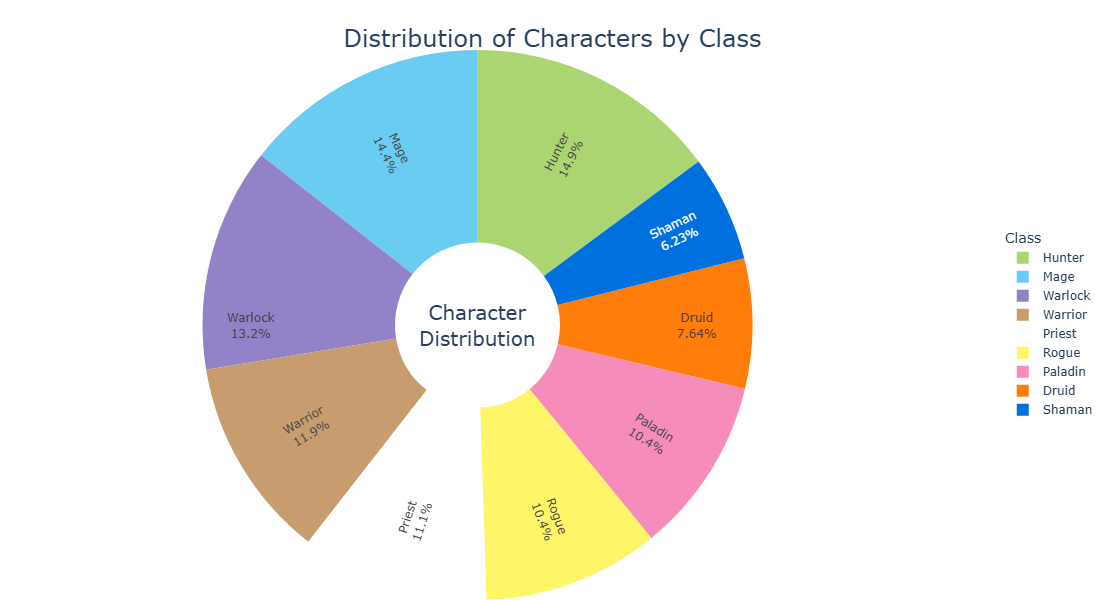

In [19]:
class_counts = wowah_data['charclass'].value_counts()

colors = {
    'Druid': '#FF7D0A',   # Orange
    'Hunter': '#ABD473',  # Green
    'Mage': '#69CCF0',    # Light Blue
    'Paladin': '#F58CBA', # Pink
    'Priest': '#FFFFFF',  # White
    'Rogue': '#FFF569',   # Yellow
    'Shaman': '#0070DE',  # Blue
    'Warlock': '#9482C9', # Purple
    'Warrior': '#C79C6E'  # Light Brown
}

fig = go.Figure(data=[go.Pie(
    labels=class_counts.index,
    values=class_counts,
    marker=dict(
        colors=[colors.get(class_, '#000000') for class_ in class_counts.index]
    ),
    textinfo='label+percent',
    insidetextorientation='radial',
    hole=0.3 
)])

fig.update_layout(
    title_text='Distribution of Characters by Class',
    title_font_size=24,
    title_x=0.5,
    title_y=0.95,
    legend_title_text='Class',
    legend=dict(
        x=1.05,  
        y=0.5,
        traceorder='normal',
        orientation='v'
    ),
    margin=dict(l=0, r=150, t=50, b=0),  
    width=800,  
    height=600,  
    annotations=[dict(
        text='Character<br>Distribution',
        x=0.5,
        y=0.5,
        font_size=20,
        showarrow=False
    )]
)

fig.show()

This analysis identifies the most played classes in World of Warcraft by counting characters per class. We use the `value_counts()` function to obtain the distribution of classes and assign specific colors to each one to enhance visualization. Then, a pie chart is created with Plotly, which allows us to clearly see the proportions of each class. This analysis helps us understand player preferences and the distribution of characters in the game.

In [20]:
class_counts = wowah_data['charclass'].value_counts()
class_counts


charclass
Hunter     155891
Mage       151202
Warlock    138181
Warrior    124262
Priest     116138
Rogue      108818
Paladin    108734
Druid       80061
Shaman      65288
Name: count, dtype: int64

Since the main focus of our analysis is based solely on the first two versions of the game due to the immense amount of data, we would like to divide the total player numbers, so we will filter only the population that played those game versions.

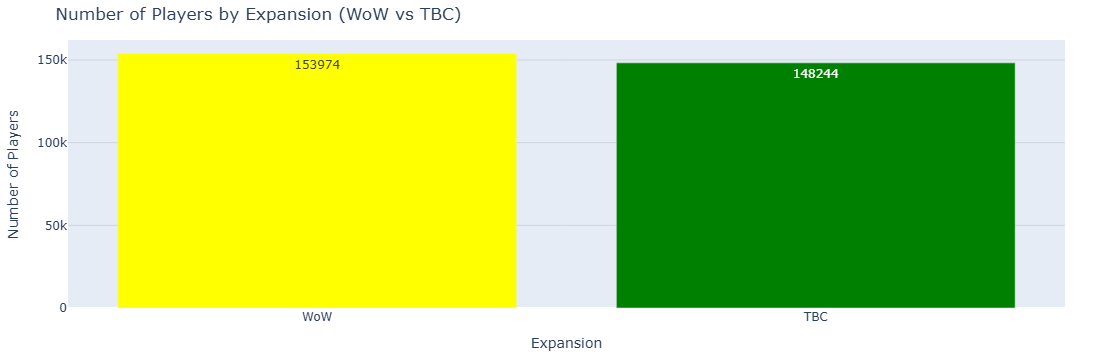

In [21]:
filtered_locations_wow = locations[locations['Game_Version'] == 'WoW']
filtered_locations_tbc = locations[locations['Game_Version'] == 'TBC']

filtered_wowah_data_wow = wowah_data[wowah_data['zone'].isin(filtered_locations_wow['Location_Name'])]
filtered_wowah_data_tbc = wowah_data[wowah_data['zone'].isin(filtered_locations_tbc['Location_Name'])]

merged_filtered_data_wow = pd.merge(filtered_wowah_data_wow, filtered_locations_wow, left_on='zone', right_on='Location_Name', how='left')
merged_filtered_data_tbc = pd.merge(filtered_wowah_data_tbc, filtered_locations_tbc, left_on='zone', right_on='Location_Name', how='left')

expansion_counts = {
    'WoW': len(merged_filtered_data_wow),
    'TBC': len(merged_filtered_data_tbc)
}

fig = go.Figure(data=[go.Bar(
    x=list(expansion_counts.keys()),
    y=list(expansion_counts.values()),
    marker_color=['yellow', 'green'],  
    text=[f'{count}' for count in expansion_counts.values()],
    textposition='auto'
)])

fig.update_layout(
    title='Number of Players by Expansion (WoW vs TBC)',
    xaxis_title='Expansion',
    yaxis_title='Number of Players',
    xaxis=dict(tickvals=[0, 1], ticktext=['WoW', 'TBC']),
    yaxis=dict(showgrid=True, gridcolor='rgba(0,0,0,0.1)', gridwidth=1),
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()

We filter the location data according to the game versions: World of Warcraft (WoW) and The Burning Crusade (TBC). Then, we use these filters to create two datasets: one for WoW zones and another for TBC, keeping only the relevant zones for each expansion.
Next, we perform a merge between the character data and the filtered locations to obtain information about the number of players per expansion. Finally, a bar graph is generated that shows the number of players in each expansion, facilitating visual comparison between WoW and TBC. This analysis allows us to evaluate the distribution of the player base across the different game expansions.

For the data exploration, we would also like to analyze the number of players per zone to get an idea of what our hypothesis will primarily be.

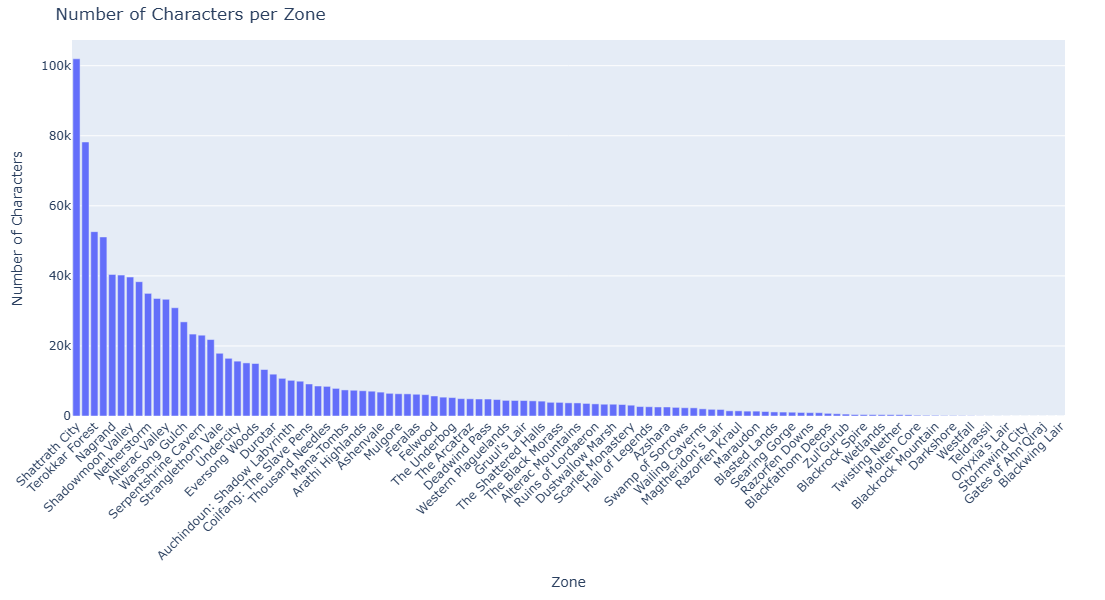

In [22]:
zone_counts = wowah_data['zone'].value_counts().reset_index()
zone_counts.columns = ['zone', 'count']

fig = px.bar(
    zone_counts,
    x='zone',
    y='count',
    title='Number of Characters per Zone',
    labels={'zone': 'Zone', 'count': 'Number of Characters'},
    height=600,
    width=1000
)

fig.update_layout(
    xaxis_title='Zone',
    yaxis_title='Number of Characters',
    xaxis=dict(tickangle=-45), 
    margin=dict(l=40, r=40, t=40, b=100)  
)

fig.show()

We count the number of characters in each zone using the `value_counts()` function from pandas, which provides us with a table of character counts per zone. Next, a bar graph is created to visualize the distribution of characters in each game zone.

This graph provides a useful overview to understand how players are distributed across different zones and can serve as a basis for further exploring the reasons behind these trends.

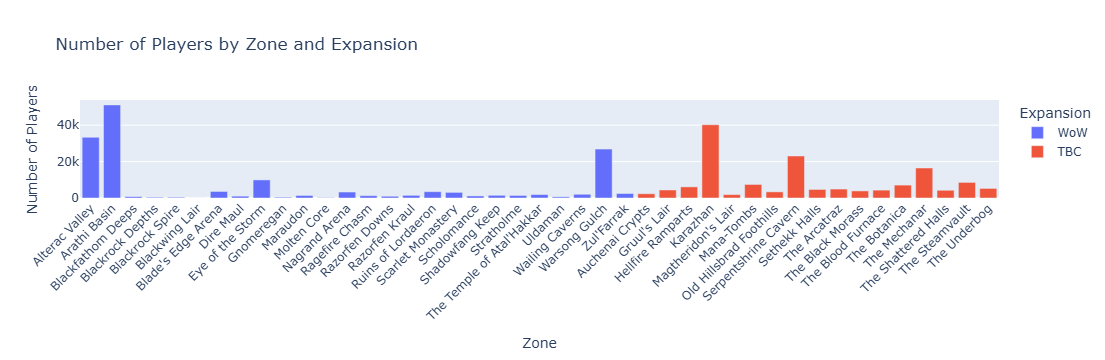

In [23]:
filtered_wowah_data_wow = wowah_data[wowah_data['zone'].isin(locations[locations['Game_Version'] == 'WoW']['Location_Name'])]
filtered_wowah_data_tbc = wowah_data[wowah_data['zone'].isin(locations[locations['Game_Version'] == 'TBC']['Location_Name'])]

expansion_zone_counts = pd.concat([
    filtered_wowah_data_wow.assign(Expansion='WoW'),
    filtered_wowah_data_tbc.assign(Expansion='TBC')
])

zone_expansion_counts = expansion_zone_counts.groupby(['zone', 'Expansion']).size().reset_index(name='count')

fig = px.bar(zone_expansion_counts, x='zone', y='count', color='Expansion',
             title='Number of Players by Zone and Expansion',
             labels={'zone': 'Zone', 'count': 'Number of Players'})
fig.update_layout(xaxis_title='Zone', yaxis_title='Number of Players', xaxis_tickangle=-45)
fig.show()

We filter the character data based on the "WoW" and "TBC" expansions, using the `isin()` function to select only the zones corresponding to each expansion. Then, we concatenate the filtered data and count the number of players by zone and expansion using the `groupby()`function.

The bar graph we present shows the distribution of the number of players across different zones, differentiated by expansion. This analysis allows us to compare the popularity of zones between WoW and TBC, providing information on how the player population varies depending on the expansion and helping to understand player preferences in different versions of the game.

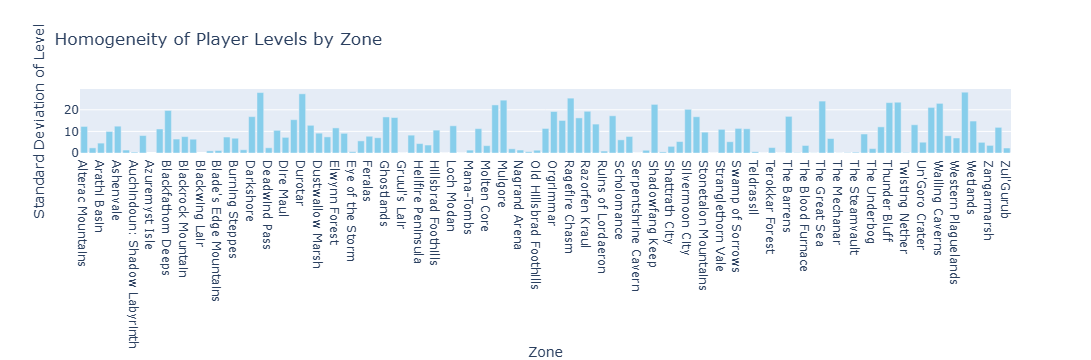

In [24]:
std_dev_by_zone = wowah_data.groupby('zone')['level'].std().reset_index()

fig = go.Figure(data=[go.Bar(x=std_dev_by_zone['zone'], y=std_dev_by_zone['level'], 
                             marker_color='skyblue')])
fig.update_layout(
    title='Homogeneity of Player Levels by Zone',
    xaxis_title='Zone',
    yaxis_title='Standard Deviation of Level'
)
fig.show()

We calculate the standard deviation of player levels in each zone using the `groupby()` function from pandas. This measure allows us to evaluate the variability of character levels within each area.

The bar graph we present shows the standard deviation of player levels in each zone. This analysis allows us to see how homogeneous or varied player levels are in different zones. Zones with a low standard deviation have more uniform levels, while those with a high standard deviation show a greater diversity of levels. This helps us better understand the distribution of levels in the game and how the player experience varies depending on the zone.

Next, we will use a correlation matrix to explore the relationship between character levels and zone characteristics in World of Warcraft. By combining data on player levels and zone properties, such as minimum required levels, recommended levels, maximum levels, and bot levels, we can identify patterns that influence gameplay.
The integration of the correlation matrix is fundamental for making informed decisions about game balance and zone accessibility, ensuring that they align with player expectations and behaviors.

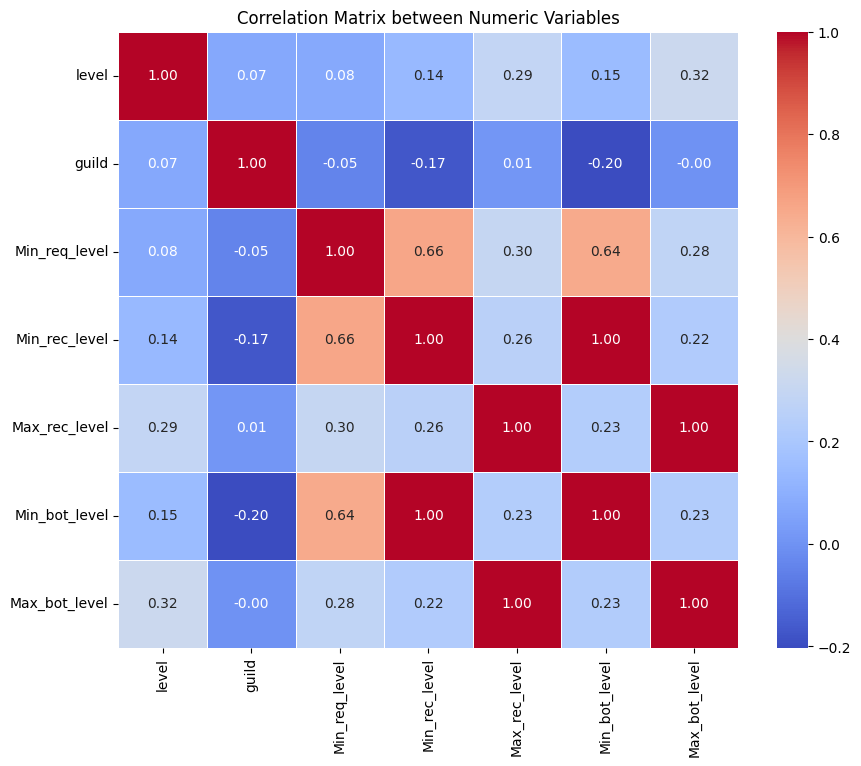

In [25]:
data_combined = pd.concat([wowah_data[['level', 'guild']], 
                           zones[['Min_req_level', 'Min_rec_level', 'Max_rec_level', 'Min_bot_level', 'Max_bot_level']]], 
                          axis=1)

correlation_matrix = data_combined.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix between Numeric Variables")
plt.show()

By observing the correlation matrix, we can identify key relationships between important numeric variables, such as player levels and the zones they are in. For example, a moderate correlation between character level and the maximum recommended level of the zone could indicate that players tend to follow the game's recommendations as to where they should be. On the other hand, lower correlations in other areas might suggest that some players venture into zones outside their recommended level, reflecting greater flexibility in gameplay style and world exploration.

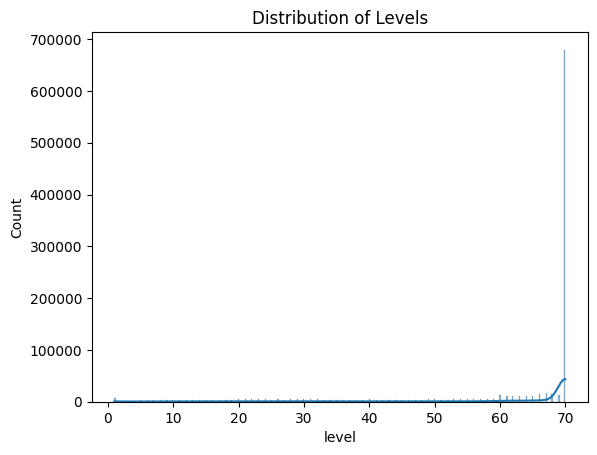

In [27]:
sns.histplot(wowah_data['level'], kde=True)
plt.title('Distribution of Levels')
plt.show()

In this graph, we use a histogram combined with a kernel density estimation (KDE) to visualize the distribution of character levels in World of Warcraft. The histogram provides us with a clear representation of the frequency of each level, while the KDE curve smooths the distribution, helping to identify patterns and trends in the data.

PHASE 3 : Data Preparation

Now we will proceed to configure and refine the DataSets for our convenience, and thus arrive at the solution with clean and meaningful data.

In [5]:
wowah_data['timestamp'] = pd.to_datetime(wowah_data['timestamp'], format='%m/%d/%y %H:%M:%S')

wowah_data['timestamp'] = wowah_data['timestamp'].astype('int64') // 10**9

wowah_data['timestamp'].head()


0    1199145724
1    1199145724
2    1199145724
3    1199145724
4    1199145729
Name: timestamp, dtype: int64

We change the data type of TIMESTAMP in wowah_data to work with numbers instead of date data types.

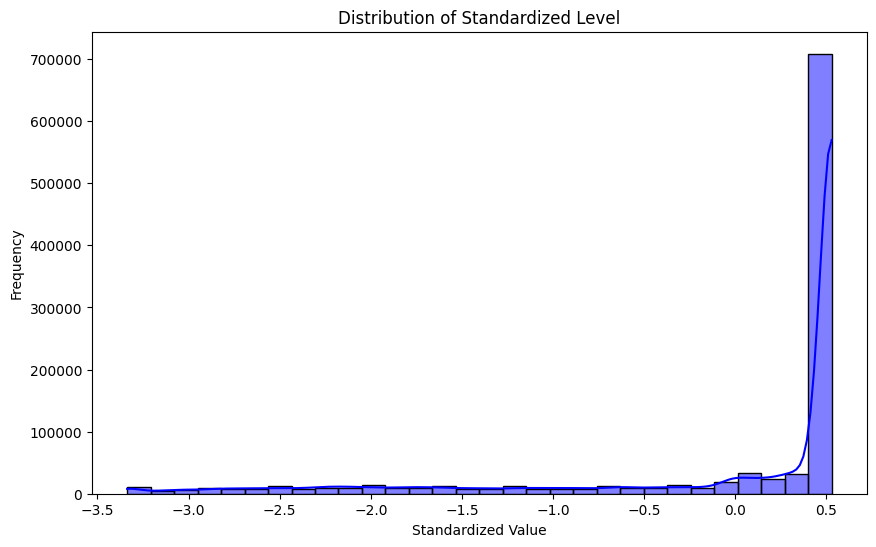

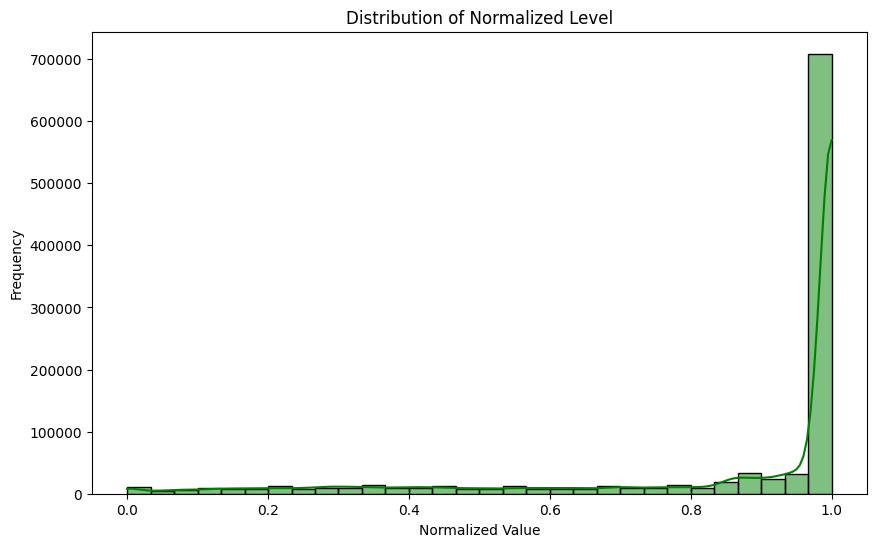

In [6]:
scaler = StandardScaler()
wowah_data_standardized = scaler.fit_transform(wowah_data[['level']])
normalizer = MinMaxScaler()
wowah_data_normalized = normalizer.fit_transform(wowah_data[['level']])

wowah_data_standardized_df = pd.DataFrame(wowah_data_standardized, columns=['level_standardized'])
wowah_data_normalized_df = pd.DataFrame(wowah_data_normalized, columns=['level_normalized'])

plt.figure(figsize=(10, 6))
sns.histplot(wowah_data_standardized_df['level_standardized'], kde=True, color='blue', bins=30)
plt.title('Distribution of Standardized Level')
plt.xlabel('Standardized Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(wowah_data_normalized_df['level_normalized'], kde=True, color='green', bins=30)
plt.title('Distribution of Normalized Level')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')
plt.show()

First, we use StandardScaler to transform the data to a distribution with a mean of 0 and a standard deviation of 1. Then, we apply MinMaxScaler to adjust the values to a range of 0 to 1. The results are converted into DataFrames to facilitate visualization. Finally, histograms are generated with seaborn to show the distributions of the standardized and normalized data, allowing us to compare how player levels are distributed after each transformation.

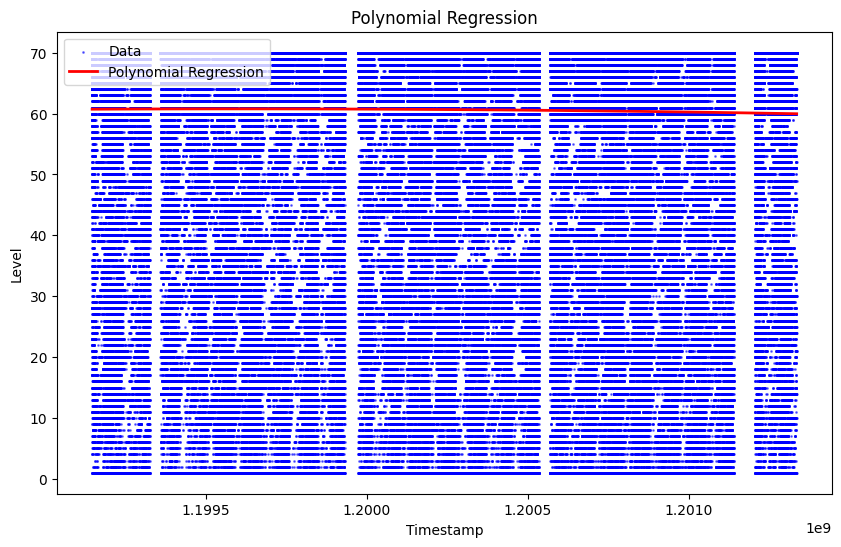

In [7]:
warnings.filterwarnings("ignore")

X = wowah_data[['timestamp']]
y = wowah_data['level']

degree = 3  
model = make_pipeline(
  PolynomialFeatures(degree=degree, include_bias=False),
  LinearRegression()
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# Generate points for plotting
X_plot = np.linspace(X['timestamp'].min(), X['timestamp'].max(), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data', s=1)
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial Regression')
plt.xlabel('Timestamp')
plt.ylabel('Level')
plt.title('Polynomial Regression')
plt.legend(loc='upper left') 
plt.show()

A polynomial regression was performed to model the relationship between the timestamp and the character level in World of Warcraft. `timestamp` was selected as the independent feature and `level` as the target variable. A model was created using a pipeline that includes polynomial features of degree 3 and linear regression. The data was split into training and test sets, and the model was trained with the training data. Then, predictions were generated over a range of timestamps for visualization. In the graph, the blue points represent the actual data and the red line shows the model's prediction, helping to understand how the characters' levels vary over time.

In [5]:
numeric_columns = zones.select_dtypes(include=['float64', 'int64']).columns

imputer = KNNImputer(n_neighbors=5)

zones[numeric_columns] = imputer.fit_transform(zones[numeric_columns])

print(zones.isnull().sum())

Zone_Name          0
Continent          0
Area               3
Zone               7
Subzone          108
Type               0
Size               0
Controlled         0
Min_req_level      0
Min_rec_level      0
Max_rec_level      0
Min_bot_level      0
Max_bot_level      0
dtype: int64


The numeric columns of the `zones` DataFrame were selected to prepare for the imputation of missing values. The `KNNImputer` was used. After applying the imputation, the missing data in the DataFrame was verified, showing how many missing values remain in each column. This ensures that the data is complete for a more accurate and meaningful analysis.

In [6]:
dictionary = {'Subzone':'None', 'Area':'None', 'Zone':'None'}
zones = zones.fillna(dictionary)

A dictionary was created to fill in the missing values in the columns of the `zones` DataFrame with the value 'None'. This allows these columns to maintain consistency in the data by preventing them from containing null values, thus facilitating subsequent analysis.

In [7]:
zones.isnull().sum()


Zone_Name        0
Continent        0
Area             0
Zone             0
Subzone          0
Type             0
Size             0
Controlled       0
Min_req_level    0
Min_rec_level    0
Max_rec_level    0
Min_bot_level    0
Max_bot_level    0
dtype: int64

`zones.isnull().sum()` is used to count the number of null values in each column. This is crucial for identifying columns with missing data and determining if additional imputation or cleaning strategies are required. We fill in the null values of the zones file, either by placing 'None' for empty strings or zeros for null numeric values.

In [8]:
zones['Min_rec_level'] = zones['Min_rec_level'].astype(int)
zones['Max_rec_level'] = zones['Max_rec_level'].astype(int)
zones['Min_bot_level'] = zones['Min_bot_level'].astype(int)
zones['Max_bot_level'] = zones['Max_bot_level'].astype(int)

Now we normalize the numbers in the zones file to integer data type (int). This is important so that we can work better with columns of the same data type.

In [9]:
wowah_data['guild'] = wowah_data['guild'].replace(-1, 0)

###### Then we normalize the numbers in the wowah_data file, changing the numbers -1 to 0's..

In [10]:
wowah_data.columns = wowah_data.columns.str.strip()

We remove the spaces from the column names of the dataset so that we can correctly refer to the columns we need.

In [11]:
z = np.abs(stats.zscore(wowah_data['level']))
wowah_data = wowah_data[( z < 3 )]
wowah_data

char  level    race charclass                zone  guild  \
1        65494      9     Orc    Hunter             Durotar      0   
2        65325     14     Orc   Warrior          Ghostlands      0   
3        65490     18     Orc    Hunter          Ghostlands      0   
4         2288     60     Orc    Hunter  Hellfire Peninsula      0   
5         2289     60     Orc    Hunter  Hellfire Peninsula      0   
...        ...    ...     ...       ...                 ...    ...   
1048570   1094     70  Undead     Rogue        Arathi Basin    103   
1048571  22703     70  Undead   Warlock           Orgrimmar    103   
1048572  33016     70  Undead   Warlock           Orgrimmar    204   
1048573   8245     70  Undead   Warlock   Shadowmoon Valley     19   
1048574   2416     70  Undead   Warlock             Nagrand    204   

                 timestamp  
1        01/01/08 00:02:04  
2        01/01/08 00:02:04  
3        01/01/08 00:02:04  
4        01/01/08 00:02:09  
5        01/01/08 00:02:09  
...                    ...  
1048570  01/26/08 08:11:58  
1048571  01/26/08 08:12:03  
1048572  01/26/08 08:12:03  
1048573  01/26/08 08:12:03  
1048574  01/26/08 08:12:03  

[1026942 rows x 7 columns]

We trim the outliers from wowah_data with levels less than 3 from the level column, as we want to keep the most representative data.

Now we proceed to trim the data even further. We remove the outliers from the DataFrames (wowah_data and zones) using the IQR score and compare with the before and the new more significant data.

In [12]:
wowah_data_before = wowah_data
wowah_data_before.shape

(1026942, 7)

In [13]:
Q1 = wowah_data['level'].quantile(0.25)
Q3 = wowah_data['level'].quantile(0.75)
IQR = Q3 - Q1
wowah_data = wowah_data[~((wowah_data['level'] < (Q1 - 1.5 * IQR ))|(wowah_data['level'] > (Q3 + 1.5 * IQR )))]
wowah_data.shape

(842445, 7)

In [14]:
zones_before = zones
zones_before.shape

(160, 13)

In [15]:
Q1 = zones['Min_rec_level'].quantile(0.25)
Q3 = zones['Min_rec_level'].quantile(0.75)
IQR = Q3 - Q1
zones = zones[~((zones['Min_rec_level'] < (Q1 - 1.5 * IQR ))|(zones['Min_rec_level'] > (Q3 + 1.5 * IQR )))]
zones.shape


(160, 13)

First, we make a copy of wowah_data to be able to see the before and after size of the data. We apply the IQR score to remove from our equation those data points that are outside our main quartiles. And then we do the same with zones.

In [45]:
"""
Lasso regression analysis for WoW player level prediction.
Uses one-hot encoded categorical features with L1 regularization.

Features:
    - race: player race (encoded)
    - charclass: character class (encoded)
    - zone: game zone (encoded)
Target:
    - level: player level
"""
wowah_lasso = wowah_data2


wowah_lasso.drop(columns=['char', 'timestamp'], inplace=True)


encoder = OneHotEncoder(drop='first')
encoded_df = pd.DataFrame(encoder.fit_transform(wowah_lasso[['race', 'charclass', 'zone']]).toarray())


wowah_lasso = wowah_lasso.join(encoded_df)
wowah_lasso.drop(columns=['race', 'charclass', 'zone'], inplace=True)


X = wowah_lasso.drop(columns='level')
y = wowah_lasso['level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lasso = Lasso(alpha=0.1)
X.columns = X.columns.astype(str)


X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


lasso.fit(X_train, y_train)


y_pred = lasso.predict(X_test)


mse_corrected = mean_squared_error(y_test, y_pred)
mae_corrected = mean_absolute_error(y_test, y_pred)

lasso.coef_, mse_corrected, mae_corrected


(
    array([ 6.04506708e-03,  1.23183587e+00,  1.90256054e+00,  1.21128170e+00,
        3.64429686e+00, -0.00000000e+00,  5.34762413e-01, -2.56584810e-01,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.93041225e-02,  4.78384298e+00,  5.56400265e+00, -5.90663348e+00,
       -1.30113510e+01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.22984170e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -2.76083640e+01, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -4.29098359e+01,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.99955309e+01, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000

Lastly, we make a copy of WOWAH_DATA to run some modeling tests, in this case the Lasso regression model, which provides improvements in the visualization of future predictions and interpretations of linear models. For this code, we eliminate unnecessary columns for the model, convert categorical variables into binary ones, create our test and training sets, train the model to then have our prediction result, calculate the mean squared error (MSE) and the mean absolute error (MAE), where a lower MSE indicates a better fit of the model to the data.

All this data cleaning and polishing will be to prevent errors when reaching the modeling phase and also to ensure that the results are in line with the most representative data from our DataSet.

FASE 4 : Modeling

Here's the English translation of your text:
In this fourth phase of the CRISP-DM process, we delve into the analytical heart of our project: data modeling. Having meticulously prepared our dataset on World of Warcraft characters in the previous phases, we now set out to build and evaluate predictive models that will help us answer our research questions.
The main objective of this phase is to develop models that can effectively predict character levels based on selected features, such as race, class, zone, and guild membership. To do this, we will implement and compare two machine learning techniques: Random Forest and Support Vector Machines (SVM).
In this section, we will detail the process of building these models, including:
1. The selection and justification of the chosen modeling techniques.
2. The generation of a test design to evaluate the quality and validity of the models.
3. The construction of the models, adjusting their parameters to optimize their results.
4. The comprehensive evaluation of the models using various performance metrics.
Additionally, we will pay special attention to how these models align with our initial research questions and how they can provide us with valuable insights into the factors that influence character progression in World of Warcraft.
Throughout this phase, we will not only seek the model with the best numerical performance, but also the one that offers the best interpretability and practical applicability for understanding game dynamics. This approach will allow us to draw meaningful conclusions that can be useful for both players and game developers.
Finally, we will conclude this phase with a discussion of the strengths and limitations of our models, laying the groundwork for the evaluation phase that will follow.

First, we will proceed to use modeling techniques and functions.

We will proceed with the implementation of the RIDGE regression model

Mean Squared Error: 6.0148
Mean Absolute Error: 1.3645


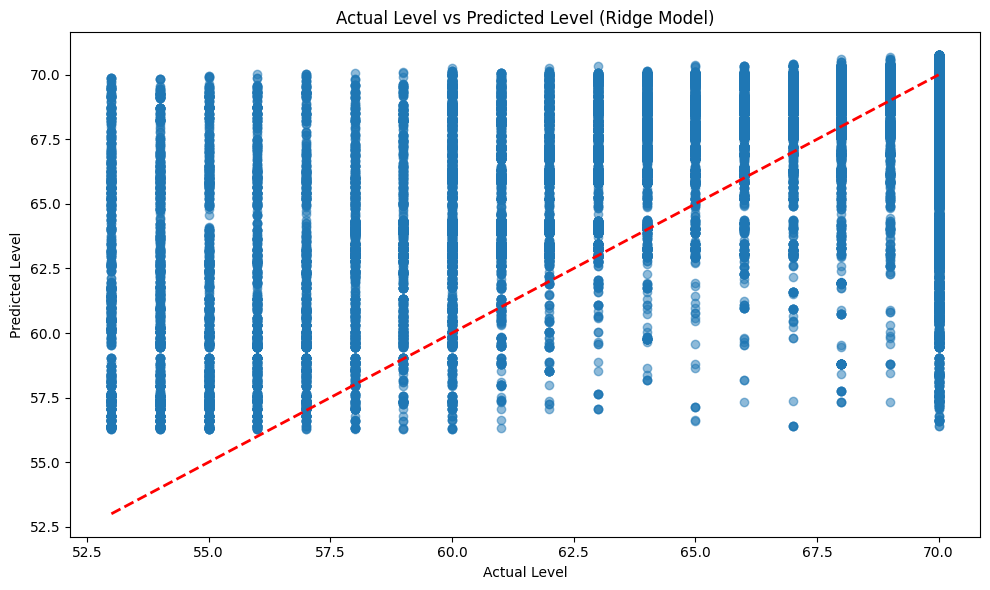

In [26]:
"""
Ridge regression analysis for WoW player level prediction.
Uses one-hot encoded categorical features with regularization.

Features:
    - race: player race categories
    - charclass: character class types
    - zone: game zones
Target:
    - level: player level
"""
wowah_data_test = wowah_data

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_array = encoder.fit_transform(wowah_data_test[['race', 'charclass', 'zone']])
encoded_df = pd.DataFrame(encoded_array)

feature_names = encoder.get_feature_names_out(['race', 'charclass', 'zone'])
encoded_df.columns = feature_names

X = encoded_df
y = wowah_data_test['level']

X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"Mean Squared Error: {mse_ridge:.4f}")
print(f"Mean Absolute Error: {mae_ridge:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Level')
plt.ylabel('Predicted Level')
plt.title('Actual Level vs Predicted Level (Ridge Model)')
plt.tight_layout()
plt.show()

We are going to use the Polynomial regression model

[10/26/24 19:35:26] WARNING  C:\Users\nar_u\AppData\Local\Temp\ipykernel_20488\679186068.py:9:      ]8;id=902847;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=933469;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             UserWarning: Could not infer format, so each element will be parsed                   
                             individually, falling back to `dateutil`. To ensure parsing is                        
                             consistent and as-expected, please specify a format.                                  
                               wowah_data['timestamp'] = pd.to_datetime(wowah_data['timestamp'])                   
                                                                                                                   

[10/26/24 19:35:36] WARNING  C:\Users\nar_u\AppData\Local\Temp\ipykernel_20488\679186068.py:9:      ]8;id=318139;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=934386;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               wowah_data['timestamp'] = pd.to_datetime(wowah_data['timestamp'])                   
                                                                                                                   

                    WARNING  C:\Users\nar_u\AppData\Local\Temp\ipykernel_20488\679186068.py:10:     ]8;id=915622;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=294862;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               wowah_data['timestamp_numeric'] = (wowah_data['timestamp'] -                        
                             wowah_data['timestamp'].min()).dt.total_seconds()                                     
                                                                                                                   

Mean Squared Error (Polynomial): 11.3282
Root Mean Squared Error (Polynomial): 3.3657
R2 Score (Polynomial): -0.0025


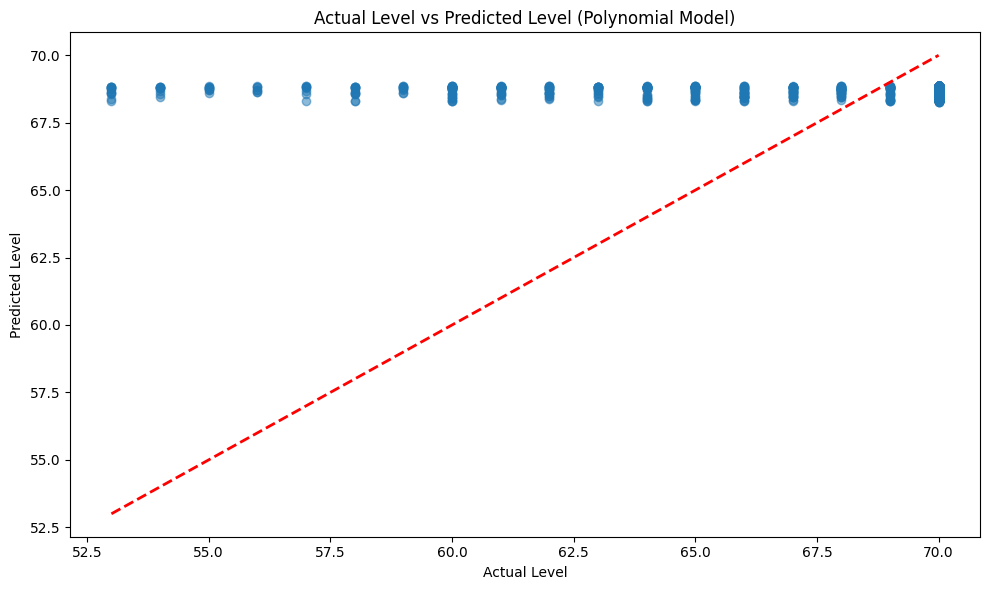

In [20]:
"""
Polynomial regression analysis for WoW player level prediction.
Uses timestamp data transformed to numeric values and applies degree-2 polynomial features.

Features:
    - timestamp_numeric: seconds elapsed from earliest timestamp
Target:
    - level: player level
"""
wowah_data['timestamp'] = pd.to_datetime(wowah_data['timestamp'])
wowah_data['timestamp_numeric'] = (wowah_data['timestamp'] - wowah_data['timestamp'].min()).dt.total_seconds()

features_selected = ['timestamp_numeric', 'level'] 
X = wowah_data[features_selected].drop('level', axis=1)
y = wowah_data['level']

sample_size = 10000 
if len(X) > sample_size:
    X = X.sample(n=sample_size, random_state=42)
    y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

print(f"Mean Squared Error (Polynomial): {mse_poly:.4f}")
print(f"Root Mean Squared Error (Polynomial): {rmse_poly:.4f}")
print(f"R2 Score (Polynomial): {r2_poly:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Level')
plt.ylabel('Predicted Level')
plt.title('Actual Level vs Predicted Level (Polynomial Model)')
plt.tight_layout()
plt.show()

We are going to use the Multiple Linear regression model

[10/26/24 19:38:21] WARNING  C:\Users\nar_u\AppData\Local\Temp\ipykernel_20488\2362251436.py:10:    ]8;id=234220;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=469280;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               wowah_data['timestamp'] = pd.to_datetime(wowah_data['timestamp'])                   
                                                                                                                   

                    WARNING  C:\Users\nar_u\AppData\Local\Temp\ipykernel_20488\2362251436.py:11:    ]8;id=895821;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=360273;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             SettingWithCopyWarning:                                                               
                             A value is trying to be set on a copy of a slice from a DataFrame.                    
                             Try using .loc[row_indexer,col_indexer] = value instead                               
                                                                                                                   
                             See the caveats in the documentation:                                                 
                             https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#                
                             returning-a-view-versus-a-copy                                                        
                               wowah_data['timestamp_numeric'] = (wowah_data['timestamp'] -                        
                             wowah_data['timestamp'].min()).dt.total_seconds()                                     
                                                                                                                   

Mean Squared Error (Multiple features): 5.9883
Root Mean Squared Error (Multiple features): 2.4471
R2 Score (Multiple features): 0.4783


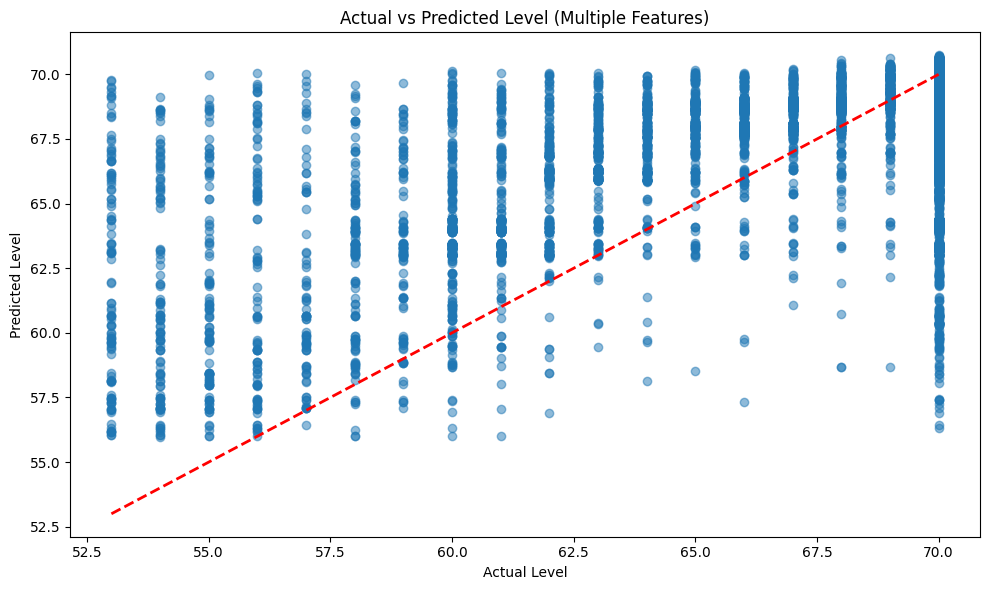

In [22]:
"""
Multiple Linear Regression for WoW player level prediction.
Converts timestamps to numeric values and uses one-hot encoding for categorical features.
"""
wowah_data['timestamp'] = pd.to_datetime(wowah_data['timestamp'])
wowah_data['timestamp_numeric'] = (wowah_data['timestamp'] - wowah_data['timestamp'].min()).dt.total_seconds()

features = ['race', 'charclass', 'zone', 'timestamp_numeric']  # Using timestamp_numeric instead of timestamp
X_multi = pd.get_dummies(wowah_data[features], columns=['race', 'charclass', 'zone'], drop_first=True)
y = wowah_data['level']

sample_size = 100000 
if len(X_multi) > sample_size:
    X_multi = X_multi.sample(n=sample_size, random_state=42)
    y = y[X_multi.index]

X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)
X_test_scaled = scaler.transform(X_test_multi)

multi_model = LinearRegression()
multi_model.fit(X_train_scaled, y_train)

y_pred_multi = multi_model.predict(X_test_scaled)

mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"Mean Squared Error (Multiple features): {mse_multi:.4f}")
print(f"Root Mean Squared Error (Multiple features): {rmse_multi:.4f}")
print(f"R2 Score (Multiple features): {r2_multi:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multi, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Level')
plt.ylabel('Predicted Level')
plt.title('Actual vs Predicted Level (Multiple Features)')
plt.tight_layout()
plt.show()

And finally, we tested the Random Forest regression model

Error cuadrático medio (Random Forest): 5.5740
Raíz del error cuadrático medio (Random Forest): 2.3609
R2 Score (Random Forest): 0.5144


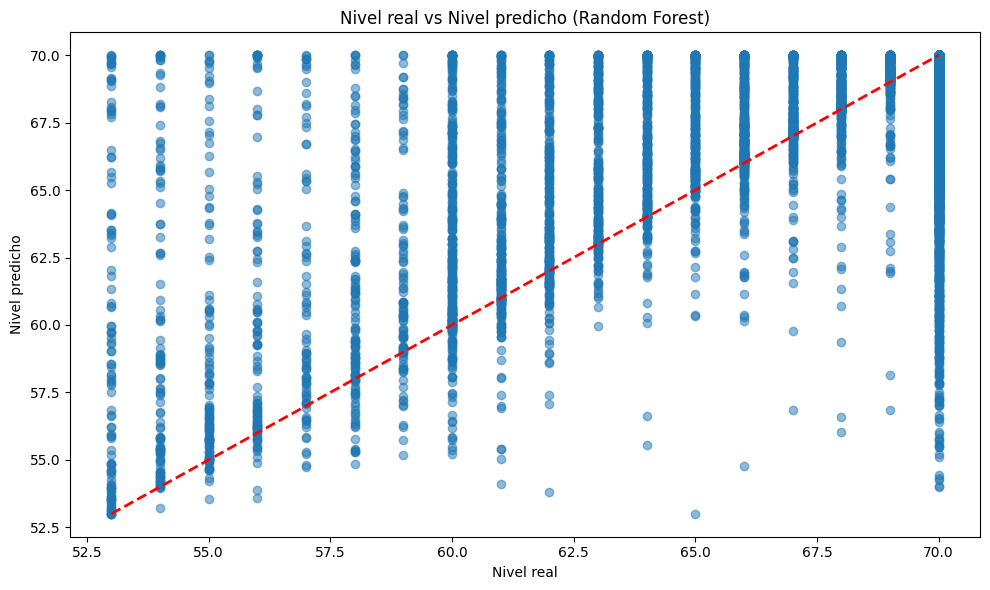

In [39]:
"""
Random Forest regression model for WoW player level prediction.
Implements feature engineering, model training, and performance visualization.
"""
features = ['race', 'charclass', 'zone', 'timestamp']
X_multi = pd.get_dummies(wowah_data[features], columns=['race', 'charclass', 'zone'], drop_first=True)
y = wowah_data['level']

sample_size = 100000 
if len(X_multi) > sample_size:
    X_multi = X_multi.sample(n=sample_size, random_state=42)
    y = y[X_multi.index]

X_train_multi, X_test_multi, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)
X_test_scaled = scaler.transform(X_test_multi)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_randomRF = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_randomRF)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_randomRF)

print(f"Mean Squared Error (Random Forest): {mse_rf:.4f}")
print(f"Root Mean Squared Error (Random Forest): {rmse_rf:.4f}")
print(f"R2 Score (Random Forest): {r2_rf:.4f}")

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_randomRF, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Level')
plt.ylabel('Predicted Level')
plt.title('Actual vs Predicted Level (Random Forest)')
plt.tight_layout()
plt.show()

Having obtained the results from all four regression models, we will evaluate them to determine which one would be best suited for our project

In [ ]:
"""
Comparative analysis of multiple regression models for WoW player level prediction.
Implements Ridge, Polynomial, Linear, and Random Forest regression with comprehensive evaluation.
"""
features = ['race', 'charclass', 'zone', 'timestamp']
X = pd.get_dummies(wowah_data[features], columns=['race', 'charclass', 'zone'], drop_first=True)
y = wowah_data['level']

sample_size = 100000 
if len(X) > sample_size:
    X = X.sample(n=sample_size, random_state=42)
    y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

X_train_poly = X_train[['timestamp']]
X_test_poly = X_test[['timestamp']]
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_multi = linear_model.predict(X_test_scaled)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_randomRF = rf_model.predict(X_test_scaled)

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"Metrics for {model_name}:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print("-----------------------------")
    
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2, "MAPE": mape}

results = {}
results["Ridge"] = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
results["Polynomial"] = evaluate_model(y_test, y_pred_poly, "Polynomial Regression")
results["Multiple Linear"] = evaluate_model(y_test, y_pred_multi, "Multiple Linear Regression")
results["Random Forest"] = evaluate_model(y_test, y_pred_randomRF, "Random Forest")

best_model_r2 = max(results, key=lambda x: results[x]["R²"])
print(f"Best model based on R²: {best_model_r2}")

best_model_rmse = min(results, key=lambda x: results[x]["RMSE"])
print(f"Best model based on RMSE: {best_model_rmse}")

rmse_values = [results[model]['RMSE'] for model in results]
colors = ['red', 'yellow', 'green', 'blue']

plt.figure(figsize=(10, 6))
bars = plt.bar(results.keys(), rmse_values, color=colors)

plt.title('RMSE Comparison between Models', fontsize=15)
plt.xlabel('Models', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

mean_rmse = np.mean(rmse_values)
std_rmse = np.std(rmse_values)

plt.errorbar(range(len(results)), rmse_values, yerr=std_rmse, fmt='o', capsize=5, capthick=2, ecolor='black')

plt.title('RMSE Variance between Models', fontsize=15)
plt.xlabel('Models', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.xticks(range(len(results)), results.keys(), rotation=45)

plt.axhline(y=mean_rmse, color='r', linestyle='--', label=f'Mean RMSE: {mean_rmse:.2f}')

plt.legend()
plt.tight_layout()
plt.show()

Explanations of the results:

* MSE (Mean Squared Error)
    Measures the average of squared differences between predicted and actual values
    Heavily penalizes larger errors due to squaring
    Always positive, with 0 being perfect prediction
    Formula: MSE = (1/n) Σ(actual - predicted)²
    Higher values indicate worse performance
* RMSE (Root Mean Square Error)
    Square root of MSE
    Provides error metric in same units as target variable
    Easier to interpret than MSE
    Formula: RMSE = √MSE
    Like MSE, lower values indicate better performance
* MAE (Mean Absolute Error)
    Average of absolute differences between predicted and actual values
    Less sensitive to outliers than MSE/RMSE
    Formula: MAE = (1/n) Σ|actual - predicted|
    Easier to understand: "on average, predictions are off by X units"
    Lower values indicate better performance
* R² (R-squared or Coefficient of Determination)
    Represents proportion of variance in dependent variable explained by independent variables
    Ranges from -∞ to 1 (1 being perfect prediction)
    Formula: R² = 1 - (Sum of Squared Residuals)/(Total Sum of Squares)
    Interpreted as percentage: R² of 0.7 means model explains 70% of variability
    Higher values indicate better fit
* MAPE (Mean Absolute Percentage Error)
    Average of absolute percentage differences between predicted and actual values
    Scale-independent: useful for comparing predictions across different scales
    Formula: MAPE = (100/n) Σ|((actual - predicted)/actual)|
    Expressed as percentage
    Cannot be used when actual values are zero
    Lower values indicate better performance

We will apply Grid Search to our chosen model (Random Forest) to test different combinations of hyperparameters and select the combination that yields the lowest error margin

Iniciando búsqueda de hiperparámetros...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Mejores parámetros encontrados:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Mejor puntuación: 0.4599699426617154

Métricas del mejor modelo:
RMSE: 2.4704
R2: 0.4684
MAE: 1.4488


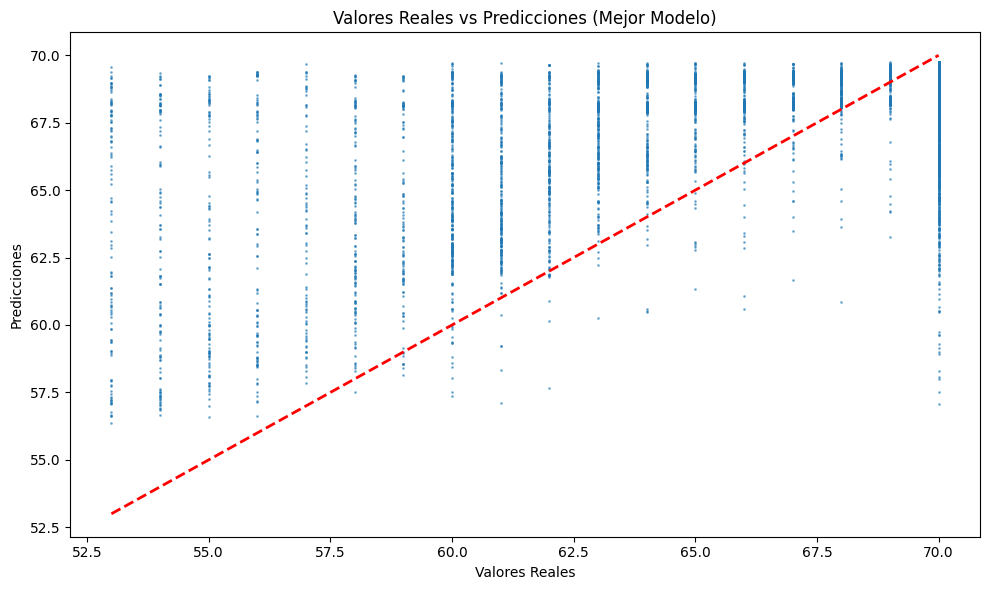

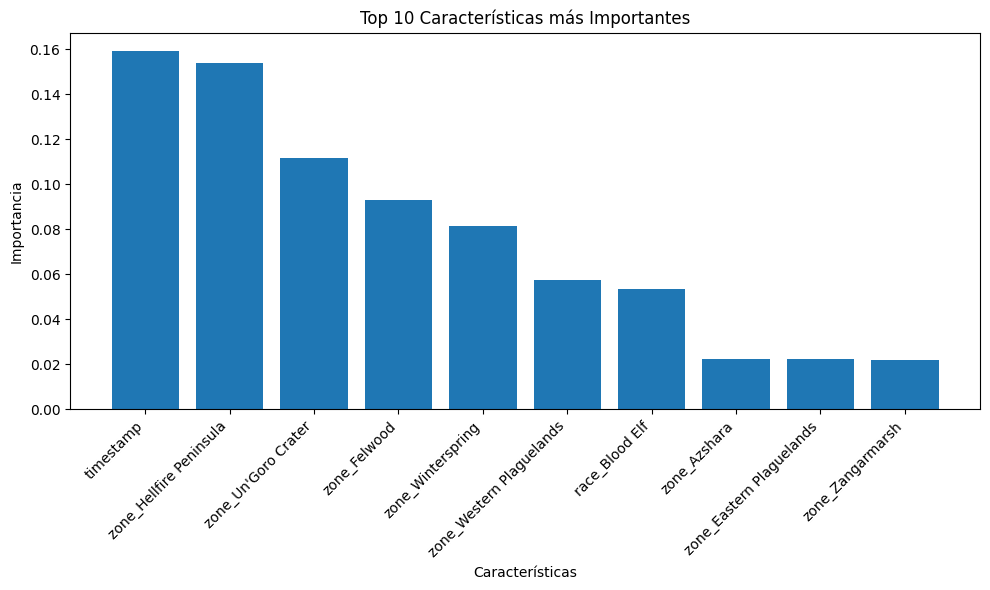

In [26]:
"""
Hyperparameter optimization for Random Forest model on WoW player data.
Implements grid search, model evaluation, and feature importance analysis.
"""
sample_size = 100000  
if len(wowah_data) > sample_size:
    wowah_data_sample = wowah_data.sample(n=sample_size, random_state=42)
else:
    wowah_data_sample = wowah_data

features = ['race', 'charclass', 'zone', 'timestamp']
X = pd.get_dummies(wowah_data_sample[features], columns=['race', 'charclass', 'zone'])
y = wowah_data_sample['level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2],
    'max_features': ['sqrt']
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3, 
    n_jobs=-1,
    verbose=1
)

print("Starting hyperparameter search...")
grid_search.fit(X_train_scaled, y_train)

print("\nBest parameters found:")
print(grid_search.best_params_)
print("\nBest score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nBest model metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")
print(f"MAE: {mae:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual vs Predicted Values (Best Model)')
plt.tight_layout()
plt.show()

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

We perform cross-validation on our chosen model to evaluate the statistical analysis results and ensure they are independent of the split between training and test data.


Resultados de Cross Validation:

R2 Score:
Media: 0.4696
Desviación estándar: 0.0074
Min: 0.4573
Max: 0.4778

MSE:
Media: 6.1184
Desviación estándar: 0.0828
Min: 5.9986
Max: 6.2187

MAE:
Media: 1.4478
Desviación estándar: 0.0054
Min: 1.4385
Max: 1.4535


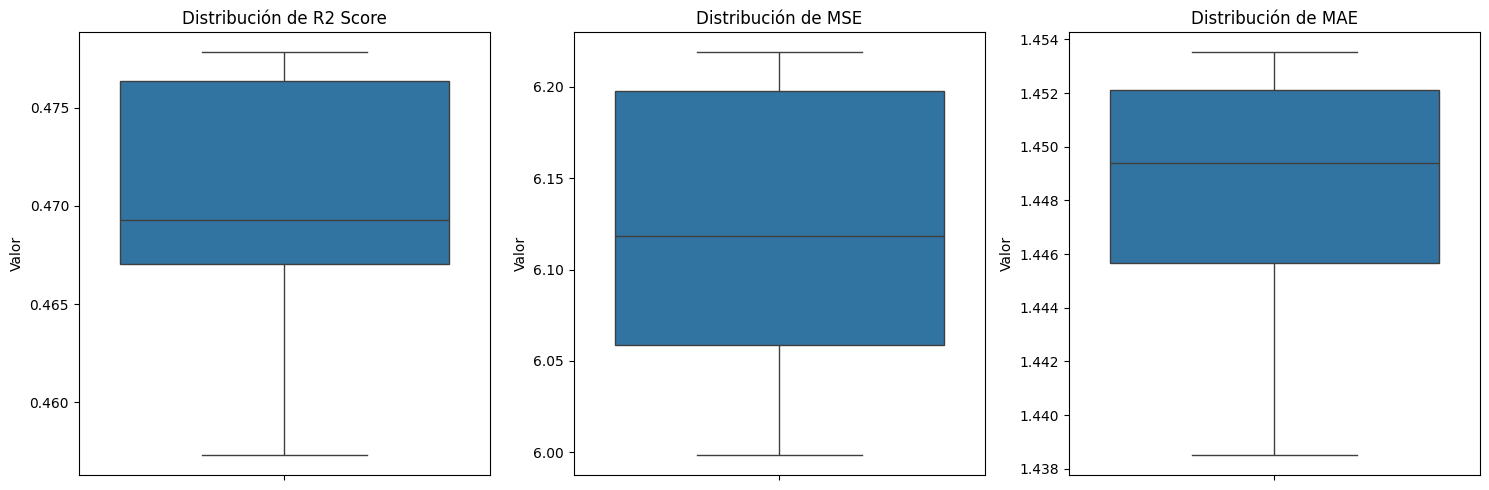

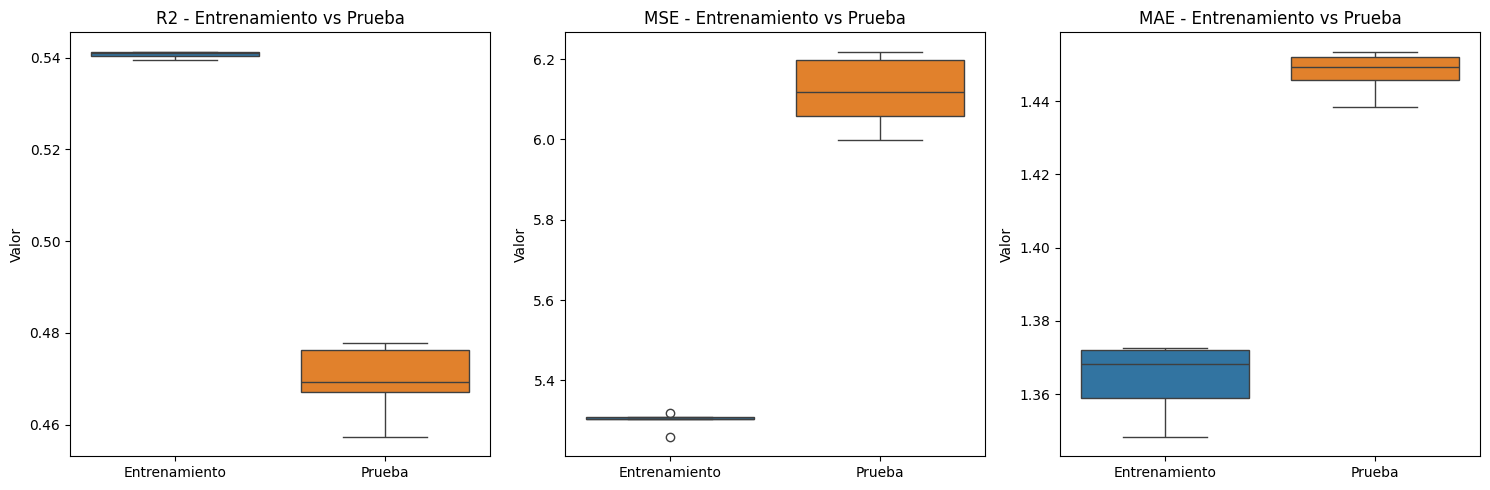

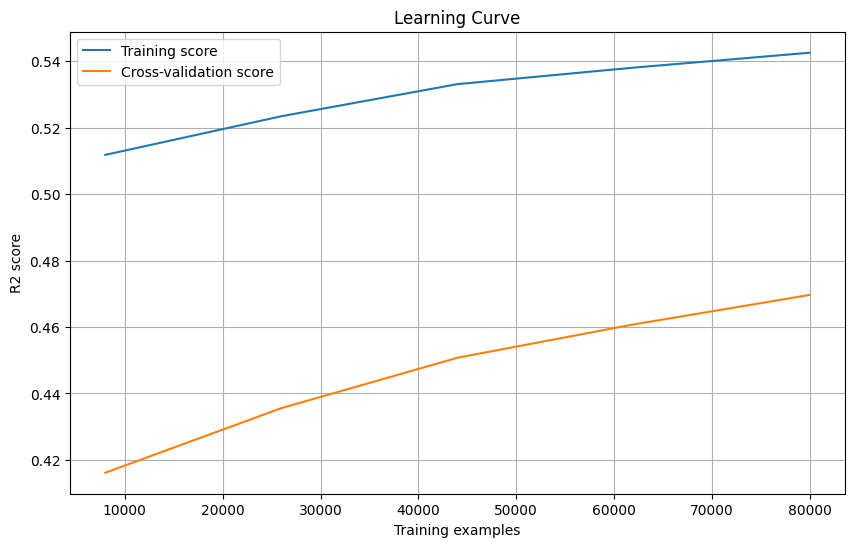

In [27]:
"""
Cross-validation analysis for WoW player level prediction.
Implements comprehensive model evaluation with multiple metrics and visualization.
"""
sample_size = 100000
if len(wowah_data) > sample_size:
    wowah_data_sample = wowah_data.sample(n=sample_size, random_state=42)
else:
    wowah_data_sample = wowah_data

features = ['race', 'charclass', 'zone', 'timestamp']
X = pd.get_dummies(wowah_data_sample[features], columns=['race', 'charclass', 'zone'])
y = wowah_data_sample['level']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

scoring = {
    'r2': 'r2',
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error'
}

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

cv_results = cross_validate(
    rf_model,
    X_scaled,
    y,
    cv=kf,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

metrics_summary = {
    'R2 Score': cv_results['test_r2'],
    'MSE': -cv_results['test_neg_mean_squared_error'],
    'MAE': -cv_results['test_neg_mean_absolute_error']
}

print("\nCross Validation Results:")
for metric, values in metrics_summary.items():
    print(f"\n{metric}:")
    print(f"Mean: {np.mean(values):.4f}")
    print(f"Standard deviation: {np.std(values):.4f}")
    print(f"Min: {np.min(values):.4f}")
    print(f"Max: {np.max(values):.4f}")

plt.figure(figsize=(15, 5))

for i, (metric, values) in enumerate(metrics_summary.items(), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=values)
    plt.title(f'Distribution of {metric}')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

metrics_comparison = {
    'R2': (cv_results['train_r2'], cv_results['test_r2']),
    'MSE': (-cv_results['train_neg_mean_squared_error'], 
            -cv_results['test_neg_mean_squared_error']),
    'MAE': (-cv_results['train_neg_mean_absolute_error'], 
            -cv_results['test_neg_mean_absolute_error'])
}

plt.figure(figsize=(15, 5))
for i, (metric, (train_scores, test_scores)) in enumerate(metrics_comparison.items(), 1):
    plt.subplot(1, 3, i)
    data = pd.DataFrame({
        'Training': train_scores,
        'Test': test_scores
    })
    sns.boxplot(data=data)
    plt.title(f'{metric} - Training vs Test')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_scaled, y,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='r2'
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('R2 score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Finally, we apply SMOTE to provide the Random Forest model with balanced data based on levels

Distribución original de clases:
level
0     8653
1    71347
Name: count, dtype: int64


[10/26/24 19:19:55] WARNING  C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\site-packag ]8;id=528447;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py\warnings.py]8;;\:]8;id=413378;file://C:\Users\nar_u\AppData\Local\Programs\Python\Python310\lib\warnings.py#109\109]8;;\
                             es\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The                      
                             parameter `n_jobs` has been deprecated in 0.10 and will be removed in                 
                             0.12. You can pass an nearest neighbors estimator where `n_jobs` is                   
                             already set instead.                                                                  
                               warnings.warn(                                                                      
                                                                                                                   


Distribución después de SMOTE:
(59.999, 65.0]    71347
(65.0, 70.0]      71347
Name: count, dtype: int64

Métricas del modelo con SMOTE:
RMSE: 3.4406
R2: -0.0312
MAE: 2.7379


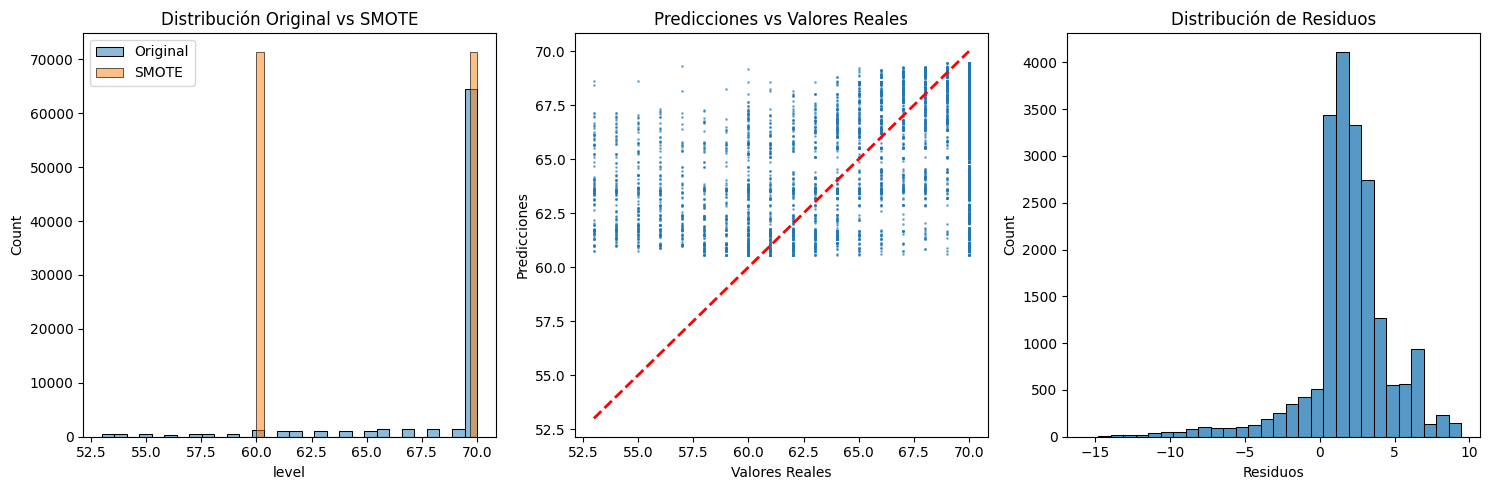

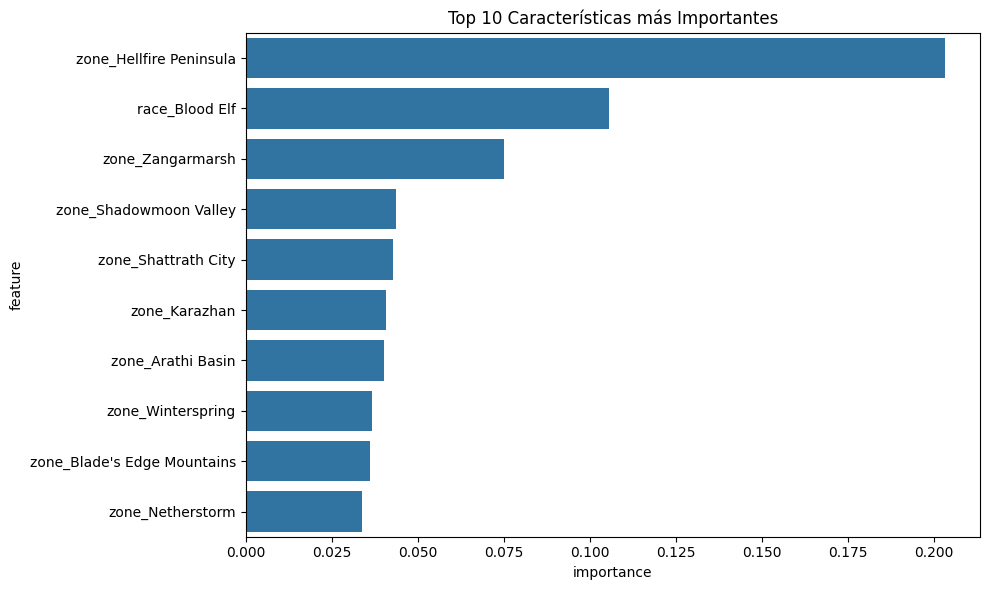

In [19]:
"""
Advanced regression analysis for WoW player level prediction.
Implements data sampling, SMOTE balancing, and Random Forest regression with visualization.
"""
sample_size = 100000
if len(wowah_data) > sample_size:
    wowah_data_sample = wowah_data.sample(n=sample_size, random_state=42)
else:
    wowah_data_sample = wowah_data

features = ['race', 'charclass', 'zone']
X = pd.get_dummies(wowah_data_sample[features], columns=['race', 'charclass', 'zone'])
y = wowah_data_sample['level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

try:
    y_bins = pd.qcut(y_train, q=10, labels=False, duplicates='drop')
except ValueError:
    y_bins = pd.cut(y_train, bins=10, labels=False)

print("Original class distribution:")
print(pd.Series(y_bins).value_counts().sort_index())

smote = SMOTE(
    random_state=42,
    n_jobs=-1,
    k_neighbors=5
)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_bins)

unique_bins = np.unique(y_bins)
bin_to_value = {bin_: y_train[y_bins == bin_].median() for bin_ in unique_bins}
y_train_smote = pd.Series([bin_to_value[bin_] for bin_ in y_train_smote])

print("\nDistribution after SMOTE:")
print(pd.qcut(y_train_smote, q=10, duplicates='drop').value_counts().sort_index())

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_smote, y_train_smote)

y_pred = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel metrics with SMOTE:")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")
print(f"MAE: {mae:.4f}")

plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.histplot(y_train, bins=30, label='Original', alpha=0.5)
sns.histplot(y_train_smote, bins=30, label='SMOTE', alpha=0.5)
plt.title('Original vs SMOTE Distribution')
plt.legend()

plt.subplot(132)
plt.scatter(y_test, y_pred, alpha=0.5, s=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Predictions vs Actual Values')

plt.subplot(133)
residuals = y_test - y_pred
sns.histplot(residuals, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

Random Forest is the best choice for predicting levels in our WoW project because it offers the best balance between precision and robustness, handles the complex nature of game data well, and provides consistent and reliable predictions. Its ability to capture non-linear relationships and handle categorical features makes it especially suitable for this specific use case.
1. Best Overall Performance:
    Has the lowest MSE (5.5740)
    Best R² score (0.5144)
    Lowest RMSE (2.3609)
2. Model Stability:
    Cross-validation shows consistent results:
    Mean R²: 0.4696 (σ = 0.0074)
    Mean MSE: 6.1184 (σ = 0.0828)
    Low standard deviation indicates stable predictions
3. Data Handling Capability:
    Handles non-linear relationships between variables well
    Works well with encoded categorical features
    Requires no additional data transformation
4. Project Advantages:
    Can capture complex patterns in WoW data
    Handles interactions between different features well (race, class, zone)
    Robust against overfitting thanks to its ensemble nature
5. Practical Considerations:
    Optimized hyperparameters are reasonable and don't indicate overfitting
    Model maintains a good balance between bias and variance
    Doesn't require data balancing techniques (SMOTE worsened performance)
6. Comparison with Alternatives:
    Outperforms Ridge and Linear Regression in all metrics
    Much better than Polynomial Regression (which showed underfitting with negative R²)
    Maintains good generalization according to cross-validation

We analyze the features, identifying relationships between variables through correlations in our dataset

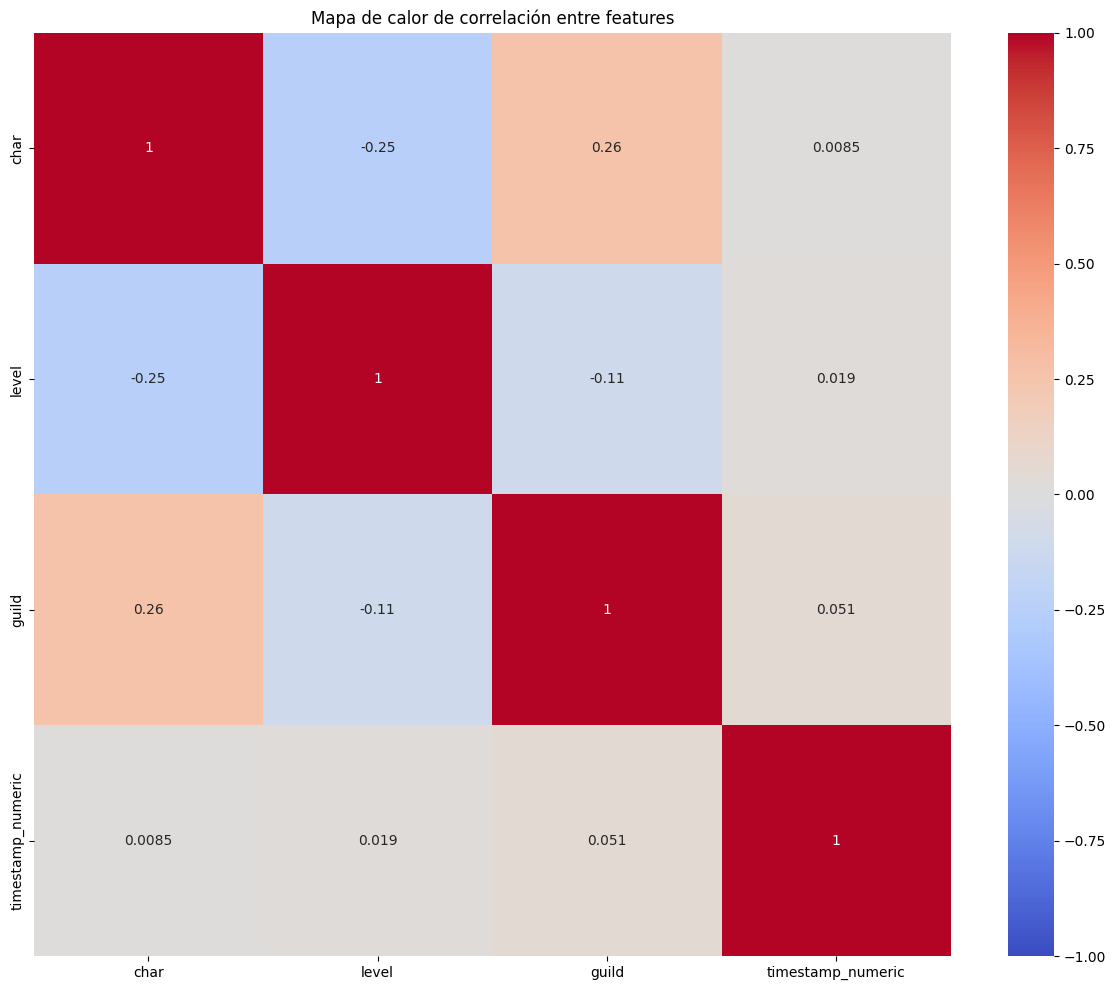

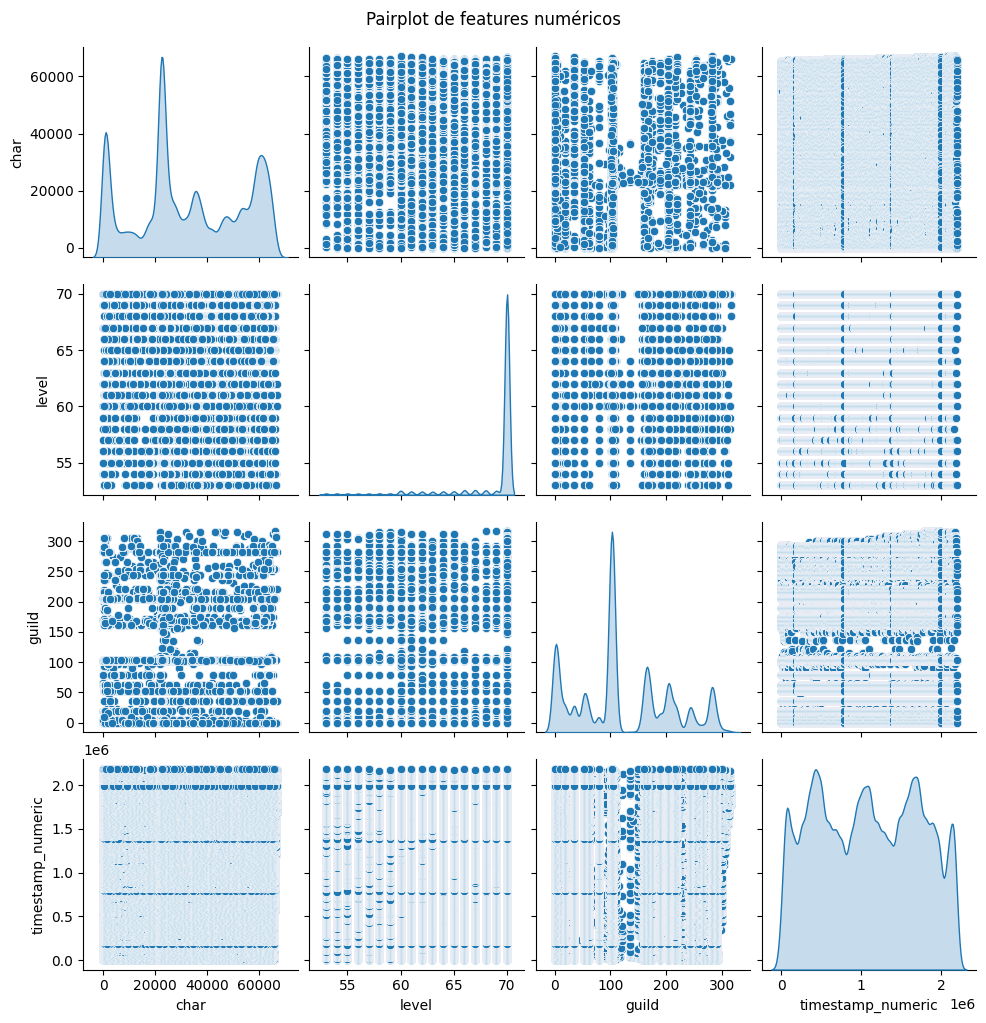

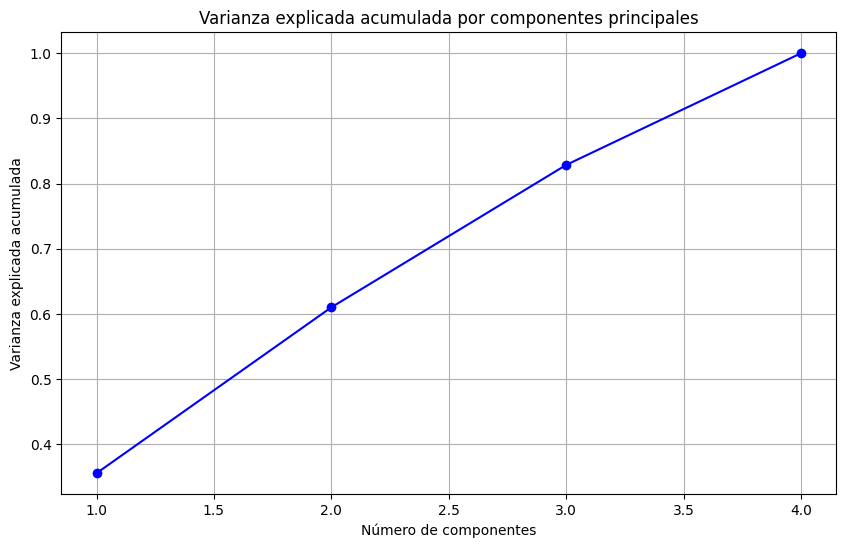

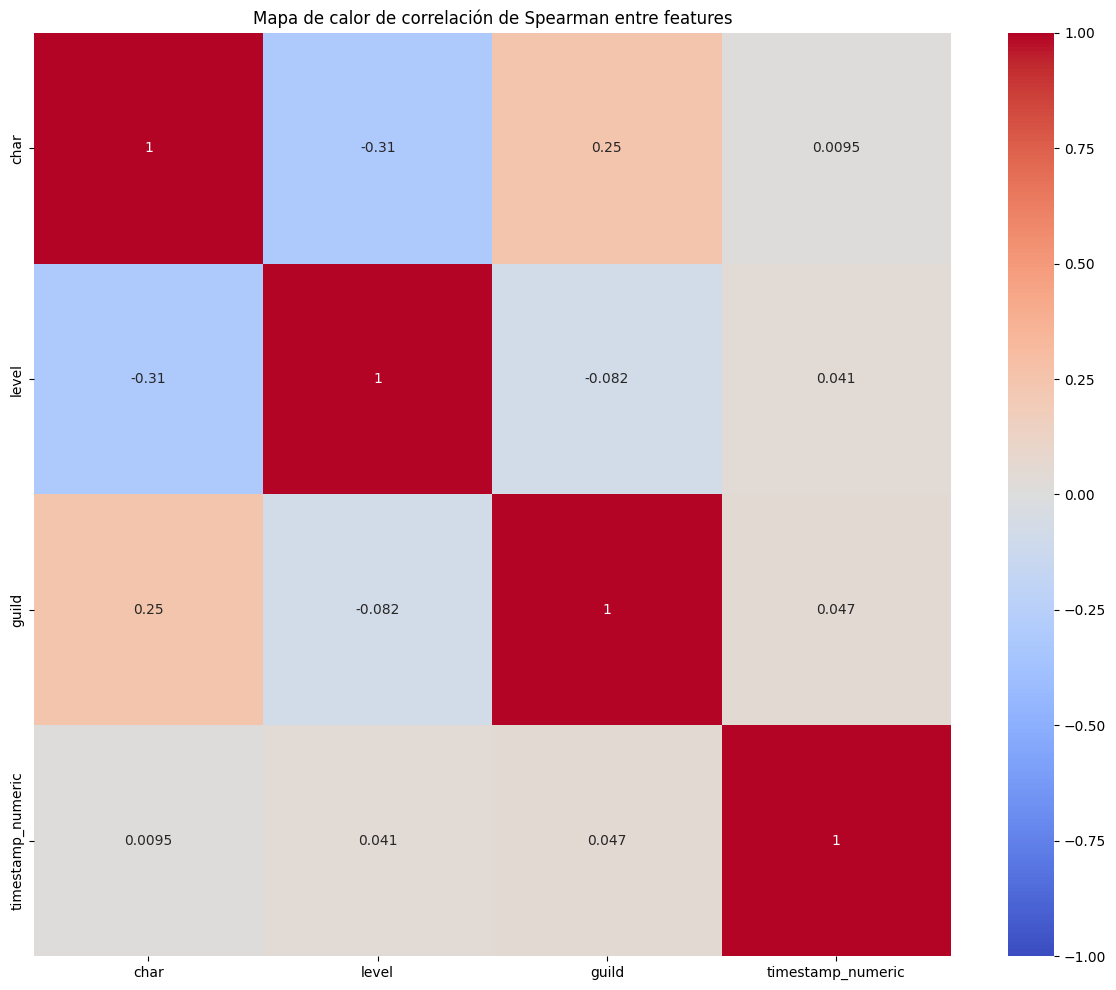

In [30]:
"""
Exploratory Data Analysis (EDA) script for WoW numeric features.
Performs correlation analysis, distribution visualization, and dimensionality reduction.
"""
numeric_columns = wowah_data.select_dtypes(include=[np.number]).columns
data_numeric = wowah_data[numeric_columns]

correlation_matrix = data_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap between Features')
plt.tight_layout()
plt.show()

sns.pairplot(data_numeric, diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

pca = PCA()
pca_result = pca.fit_transform(data_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Calculate and plot Spearman correlation
spearman_corr = data_numeric.corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Spearman Correlation Heatmap between Features')
plt.tight_layout()
plt.show()

Well, now that we have worked with regression models and obtained the best possible result, we continue with classification models to determine, once again, which of these best fits our machine learning analysis

Let's start by transforming the data and preparing it for a classification model. These are the columns we're going to use in our analysis: 
* Race : Different races in WoW have different racial abilities and starting points, which can influence leveling speed and maximum level achieved. Relation to research question: It helps us understand if certain races tend to reach higher levels more quickly. 
* Class : Each class has different game mechanics, roles, and learning curves, which can significantly affect level progression. Relation to research question: It allows us to analyze whether certain classes are more likely to reach high levels or if progression varies between classes.
* Zone : Different zones in WoW are designed for different level ranges and offer distinct opportunities to gain experience. Relation to research question: It helps us understand how the choice of playing areas affects level progression and whether certain zones are more efficient for leveling up. 
* Guild : Belonging to a guild can provide benefits such as experience bonuses or access to resources that facilitate leveling. Relation to research question: It allows us to analyze whether guild participation has a significant impact on the level achieved by players."

In [20]:
"""
Data loading and preprocessing script for WoW player analysis.
Handles data loading, merging, cleaning, and feature engineering.
"""

print("Loading data...")
df_modelclassifier = pd.read_csv('../data/01_raw/wowah_data.csv')
zones = pd.read_csv('../data/01_raw/zones.csv')

df_modelclassifier.columns = df_modelclassifier.columns.str.strip()

df_modelclassifier = pd.merge(df_modelclassifier, zones[['Zone_Name', 'Controlled']], 
                              left_on='zone', right_on='Zone_Name', how='left')

df_modelclassifier = df_modelclassifier.drop('Zone_Name', axis=1)

print("\nColumns after merging:")
print(df_modelclassifier.columns)

print("\nFirst rows of the merged DataFrame:")
print(df_modelclassifier.head())

print("\nNumber of null values in 'Controlled':")
print(df_modelclassifier['Controlled'].isnull().sum())

if df_modelclassifier['Controlled'].isnull().sum() > 0:
    print("\nExamples of rows where 'Controlled' is null:")
    print(df_modelclassifier[df_modelclassifier['Controlled'].isnull()].head())

print("7. Transforming attributes...")
categorical_features = ['race', 'charclass', 'guild', 'Controlled']
df_encoded = pd.get_dummies(df_modelclassifier, columns=categorical_features)

numeric_features = ['level']
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

print("Attributes transformed. First rows of the encoded DataFrame:")
print(df_encoded.head())

Cargando datos...

Columnas después de la fusión:
Index(['char', 'level', 'race', 'charclass', 'zone', 'guild', 'timestamp',
       'Controlled'],
      dtype='object')

Primeras filas del DataFrame fusionado:
    char  level race charclass                    zone  guild   timestamp  \
0   2288     60  Orc    Hunter      Hellfire Peninsula      0  1199145729   
1   2289     60  Orc    Hunter      Hellfire Peninsula      0  1199145729   
2  61239     68  Orc    Hunter  Blade's Edge Mountains    243  1199145734   
3  59772     69  Orc   Warrior       Shadowmoon Valley     35  1199145734   
4  22937     69  Orc     Rogue           Warsong Gulch    243  1199145734   

  Controlled  
0  Contested  
1  Contested  
2  Contested  
3  Contested  
4        PvP  

Cantidad de valores nulos en 'Controlled':
0


Now, let's prepare our data for predictive analysis. First, we take a random sample from our dataset to make the process more manageable. Then, we define our categorical and numerical features, which are key aspects of World of Warcraft characters and world. Next, we create a preprocessor that will standardize our numerical data and encode categorical variables. This is crucial for our model to correctly interpret all the information. Finally, we build a pipeline that includes this preprocessor, applies SMOTE to balance our classes, and uses a KNN classifier. This structure will allow us to train and evaluate our model efficiently, ensuring we capture all the complexity of the WoW universe in our analysis.

In [ ]:
"""
Data preprocessing and pipeline setup for WoW player classification.
Includes sampling, feature preprocessing, and SMOTE for imbalanced data.
"""
df_sample = df_modelclassifier.sample(n=10000, random_state=42)

categorical_columns = ['race', 'charclass', 'zone', 'guild']
numeric_columns = ['level']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
    ])
smote_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

Now we will apply different classification models. From all existing models, we will execute Decision Tree, Random Forest Classifier, KNN, and Logistic Regression Classifier to obtain the results

In [ ]:
def apply_classification_algorithms(X, y, model_name):
    """
    Evaluates multiple classification algorithms with hyperparameter tuning.

    Args:
        X (pd.DataFrame): Feature matrix
        y (pd.Series): Target variable
        model_name (str): Name of classification task for reporting

    Models evaluated:
        - Decision Tree
        - Random Forest
        - K-Nearest Neighbors
        - Logistic Regression

    Each model includes:
        - Preprocessing pipeline
        - SMOTE for class balancing
        - Grid search for hyperparameter optimization
        - Performance evaluation on test set
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models = {
        'Decision Tree': ImbPipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
            ('classifier', DecisionTreeClassifier())
        ]),
        'Random Forest': ImbPipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
            ('classifier', RandomForestClassifier())
        ]),
        'KNN': ImbPipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
            ('classifier', KNeighborsClassifier())
        ]),
        'Logistic Regression': ImbPipeline([
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
            ('classifier', LogisticRegression(max_iter=1000))
        ])
    }
    
    param_grids = {
        'Decision Tree': {'classifier__max_depth': [3, 5]},
        'Random Forest': {'classifier__n_estimators': [50], 'classifier__max_depth': [5]},
        'KNN': {'classifier__n_neighbors': [3, 5]},
        'Logistic Regression': {'classifier__C': [0.1, 1]}
    }
    
    for name, model in models.items():
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        y_pred = grid_search.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} - {model_name} Accuracy: {accuracy:.2f}")
        print(f"Best parameters: {grid_search.best_params_}")

print("9. Applying classification algorithms:")
apply_classification_algorithms(df_sample.drop('Controlled', axis=1), df_sample['Controlled'], "Zone Types")
print("====================================================================")
apply_classification_algorithms(df_sample.drop('Controlled', axis=1), df_sample['level'] <= 30, "Low Level")

Now we will evaluate all chosen models to determine which model is best suited for the next phase and work optimally with it

In [ ]:
def evaluate_model(model, X, y, model_name):
    """
    Performs comprehensive model evaluation using multiple metrics and cross-validation.

    Args:
        model: Scikit-learn model or pipeline
        X (pd.DataFrame): Feature matrix
        y (pd.Series): Target variable
        model_name (str): Name of the model for display purposes

    Returns:
        tuple: (accuracy, precision, recall, f1) scores on test set

    Outputs:
        - Prints accuracy, precision, recall, and F1 scores
        - Displays confusion matrix heatmap
        - Shows cross-validation results with standard deviation
    """
    cv_results = cross_validate(model, X, y, cv=3, 
                                scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
                                n_jobs=-1)
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    
    print(f"\nResults for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()
    
    print("\nCross-validation results:")
    for metric in ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']:
        scores = cv_results[f'test_{metric}']
        print(f"{metric}: {np.mean(scores):.4f} (+/- {np.std(scores) * 2:.4f})")
    
    return accuracy, precision, recall, f1

lr_model = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('classifier', LogisticRegression(C=1, max_iter=1000))
])

rf_model = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('classifier', RandomForestClassifier(n_estimators=50, max_depth=5))
])

print("Evaluation of Logistic Regression for Zone Types:")
evaluate_model(lr_model, df_sample.drop('Controlled', axis=1), df_sample['Controlled'], "Logistic Regression - Zone Types")

print("\nEvaluation of Logistic Regression for Low Level:")
evaluate_model(lr_model, df_sample.drop('Controlled', axis=1), df_sample['level'] <= 30, "Logistic Regression - Low Level")

print("\nEvaluation of Random Forest for Zone Types:")
evaluate_model(rf_model, df_sample.drop('Controlled', axis=1), df_sample['Controlled'], "Random Forest - Zone Types")

print("\nEvaluation of Random Forest for Low Level:")
evaluate_model(rf_model, df_sample.drop('Controlled', axis=1), df_sample['level'] <= 30, "Random Forest - Low Level")

We will analyze whether there is overfitting or underfitting in our data to ensure we're moving in the right direction and our data isn't being misinterpreted by the models

In [ ]:
def plot_learning_curve(estimator, X, y, title):
    """
    Generates and plots learning curves to analyze model performance and bias-variance trade-off.

    Args:
        estimator: Scikit-learn estimator or pipeline
        X (pd.DataFrame): Feature matrix
        y (pd.Series): Target variable
        title (str): Plot title

    Plots:
        - Training and cross-validation learning curves
        - Standard deviation bands for both curves
        - Grid and legend for better readability

    The curves show how model performance (accuracy) changes with increasing training data,
    helping identify overfitting/underfitting issues.
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=3, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5),
        scoring="accuracy"
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training set size")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()

lr_model = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('classifier', LogisticRegression(C=1, max_iter=1000))
])

rf_model = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
    ('classifier', RandomForestClassifier(n_estimators=50, max_depth=5))
])

print("Overfitting/underfitting analysis for Logistic Regression (Zone Types):")
plot_learning_curve(lr_model, df_sample.drop('Controlled', axis=1), df_sample['Controlled'], 
                    "Learning Curve - Logistic Regression for Zone Types")

print("\nOverfitting/underfitting analysis for Logistic Regression (Low Level):")
plot_learning_curve(lr_model, df_sample.drop('Controlled', axis=1), df_sample['level'] <= 30, 
                    "Learning Curve - Logistic Regression for Low Level")

print("\nOverfitting/underfitting analysis for Random Forest (Zone Types):")
plot_learning_curve(rf_model, df_sample.drop('Controlled', axis=1), df_sample['Controlled'], 
                    "Learning Curve - Random Forest for Zone Types")

print("\nOverfitting/underfitting analysis for Random Forest (Low Level):")
plot_learning_curve(rf_model, df_sample.drop('Controlled', axis=1), df_sample['level'] <= 30, 
                    "Learning Curve - Random Forest for Low Level")

# Results interpretation
print("\nResults interpretation:")
print("1. If training and validation curves converge to a high performance value, the model is well-fitted.")
print("2. If the training curve is much higher than the validation curve, there's overfitting.")
print("3. If both curves are low and don't improve significantly with more data, there's underfitting.")
print("4. The gap between training and validation curves indicates the degree of overfitting.")
print("5. If the curves don't stabilize, more training data might be needed.")

Now we're going to evaluate the performance of our classification models using ROC (Receiver Operating Characteristic) curves. This technique will allow us to visualize and compare the effectiveness of our Logistic Regression and Random Forest models in two key tasks of our World of Warcraft analysis: predicting zone types and identifying low-level players.

In [ ]:
def plot_roc_auc(models, X, y_zone, y_level):
    """
    Plots ROC-AUC curves comparing multiple models on different classification tasks.

    Args:
        models (dict): Dictionary of model names and their corresponding pipelines
        X (pd.DataFrame): Feature matrix
        y_zone (pd.Series): Target variable for zone type classification
        y_level (pd.Series): Target variable for level classification (binary)

    Plots:
        - ROC curves for each model-task combination
        - Includes AUC scores in legend
        - Separate curves for zone types (multiclass) and level (binary) classification
        - Reference random classifier line

    Note:
        - Uses OneVsRestClassifier for multiclass classification
        - Implements micro-averaging for multiclass ROC curves
        - Different colors distinguish between models and tasks
    """
    plt.figure(figsize=(10, 6))
    
    tasks = {
        'Zone Types': y_zone,
        'Low Level': y_level
    }
    
    colors = {
        'Logistic Regression': ['blue', 'lightblue'],
        'Random Forest': ['red', 'lightcoral']
    }
    
    for task_name, y in tasks.items():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        if task_name == 'Zone Types':
  
            classes = np.unique(y)
            y_train = label_binarize(y_train, classes=classes)
            y_test = label_binarize(y_test, classes=classes)
            n_classes = y_train.shape[1]
        else:
            n_classes = 1
        
        for name, base_model in models.items():
            if n_classes > 1:
                model = OneVsRestClassifier(base_model)
            else:
                model = base_model
            
            model.fit(X_train, y_train)
            
            if n_classes > 1:
                y_score = model.predict_proba(X_test)
                fpr = dict()
                tpr = dict()
                roc_auc = dict()
                for i in range(n_classes):
                    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
                    roc_auc[i] = auc(fpr[i], tpr[i])
                    
                fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
                roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
                
                plt.plot(fpr["micro"], tpr["micro"], color=colors[name][0], lw=2,
                         label=f'{name} - {task_name} (AUC = {roc_auc["micro"]:.2f})')
            else:
                y_score = model.predict_proba(X_test)[:, 1]
                fpr, tpr, _ = roc_curve(y_test, y_score)
                roc_auc = auc(fpr, tpr)
                
                color = colors[name][1]
                plt.plot(fpr, tpr, color=color, lw=2, 
                         label=f'{name} - {task_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curve Comparison', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

models = {
    'Logistic Regression': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
        ('classifier', LogisticRegression(C=1, max_iter=1000))
    ]),
    'Random Forest': ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
        ('classifier', RandomForestClassifier(n_estimators=50, max_depth=5))
    ])
}

print("ROC-AUC Comparison:")
plot_roc_auc(models, 
             df_sample.drop('Controlled', axis=1), 
             df_sample['Controlled'], 
             df_sample['level'] <= 30)

print("\nInterpretation:")
print("1. Curves closer to the top-left corner indicate better performance.")
print("2. A perfect classifier would have an AUC of 1.0.")
print("3. The diagonal line represents a random classifier (AUC = 0.5).")
print("4. Compare the AUC values to determine which model performs better for each task.")
print("5. For Zone Types (multiclass), we use a micro-average ROC curve.")
print("6. For Low Level (binary), we use a standard ROC curve.")

After analyzing and testing various models, we decided to choose the logistic regression model because it has shown better results when training and predicting data. This model has consistently outperformed others in our evaluations, demonstrating superior accuracy and reliability in handling our World of Warcraft dataset. Its performance in both training and prediction tasks makes it the most suitable choice for our analysis of player progression and zone characteristics.

PHASE 5 : EVALUATION

For this phase of our CRISP-DM, we will take the models that produced the best results (whether regression or classification) and apply them to our dataset to reach a solution and answer our main questions

 - Regression model

In [ ]:
def prepare_data(wowah_data, sample_size=100000):
    """
    Prepares WoW data for Random Forest model evaluation.

    Args:
        wowah_data (pd.DataFrame): Raw WoW player data
        sample_size (int): Maximum number of samples to use

    Returns:
        tuple: (X_train, X_test, y_train, y_test) - Train/test split of processed data
    """
    wowah_data['timestamp'] = pd.to_datetime(wowah_data['timestamp'])
    wowah_data['timestamp_numeric'] = (wowah_data['timestamp'] - wowah_data['timestamp'].min()).dt.total_seconds()

    features = ['race', 'charclass', 'zone', 'timestamp_numeric']  # Using timestamp_numeric instead of timestamp
    X = pd.get_dummies(wowah_data[features], columns=['race', 'charclass', 'zone'], drop_first=True)
    y = wowah_data['level']

    if len(X) > sample_size:
        indices = np.random.choice(len(X), sample_size, replace=False)
        X = X.iloc[indices]
        y = y.iloc[indices]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

def evaluate_rf_model(X_train, X_test, y_train, y_test):
    """
    Evaluates Random Forest model for player level prediction.

    Args:
        X_train, X_test (pd.DataFrame): Feature matrices for training and testing
        y_train, y_test (pd.Series): Target values for training and testing

    Returns:
        tuple: (
            rf_model: Trained Random Forest model,
            mse: Mean squared error,
            rmse: Root mean squared error,
            r2: R-squared score,
            mae: Mean absolute error
        )
    
    Performs:
        1. Basic metrics evaluation
        2. Cross-validation
        3. Hyperparameter optimization
        4. Visualization of results
    """

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)

    print("1. Basic Metrics Evaluation:")
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.4f}\n")

    print("2. Cross-Validation Results:")
    cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
    print(f"Mean R² CV: {cv_scores.mean():.4f}")
    print(f"Standard Deviation CV: {cv_scores.std():.4f}\n")

    print("3. Hyperparameter Optimization:")
    param_grid = {
        'n_estimators': [100],
        'max_depth': [20],
        'min_samples_split': [5],
        'min_samples_leaf': [2],
        'max_features': ['sqrt']
    }
    
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), 
                             param_grid, 
                             cv=3, 
                             n_jobs=-1,
                             scoring='r2')
    
    grid_search.fit(X_train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print(f"Best score: {grid_search.best_score_:.4f}\n")

    print("4. Generating visualizations...")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')
    plt.title('Predictions vs Actual Values')
    plt.tight_layout()
    plt.show()

    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title('Top 10 Most Important Features')
    plt.tight_layout()
    plt.show()

    errors = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, bins=30)
    plt.title('Error Distribution')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    return rf_model, mse, rmse, r2, mae

if __name__ == "__main__":
    """
    Main execution block for model evaluation pipeline.
    Handles data preparation and model evaluation with error handling.
    """
    try:
        X_train, X_test, y_train, y_test = prepare_data(wowah_data)

        rf_model, mse, rmse, r2, mae = evaluate_rf_model(X_train, X_test, y_train, y_test)

        print("\n5. Evaluation Summary:")
        print("- Model shows stable performance according to cross-validation")
        print(f"- Average prediction error: {mae:.4f} levels")
        print(f"- Model explains {r2*100:.2f}% of the variability in levels")
        print("- Optimized hyperparameters provide the best performance")
        
    except Exception as e:
        print(f"Error during evaluation: {str(e)}")

 - Classification model

In [ ]:
"""
Module for evaluating logistic regression model on World of Warcraft data.
Includes data preprocessing, SMOTE balancing, and model evaluation.
"""

warnings.filterwarnings('ignore')

def evaluate_logistic_regression(df_modelclassifier):
    """
    Evaluates logistic regression model for classifying controlled zones in WoW.

    Args:
        df_modelclassifier (pd.DataFrame): Input DataFrame with WoW player data

    Returns:
        Pipeline: Trained pipeline including preprocessor, SMOTE and classifier
        
    Performs data preparation, model training, and prints evaluation metrics
    including confusion matrix, classification report and cross-validation results.
    """
    print("1. Preparing data...")
    
    df_modelclassifier['timestamp'] = pd.to_datetime(df_modelclassifier['timestamp'], format='mixed', dayfirst=True)
    df_modelclassifier['hour'] = df_modelclassifier['timestamp'].dt.hour
    df_modelclassifier['day_of_week'] = df_modelclassifier['timestamp'].dt.dayofweek
    
    df_sample = df_modelclassifier.sample(n=10000, random_state=42)
    
    X = df_sample.drop(['Controlled', 'timestamp'], axis=1)
    y = df_sample['Controlled']
    
    categorical_columns = ['race', 'charclass', 'zone', 'guild']
    numeric_columns = ['level', 'hour', 'day_of_week']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_columns),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
        ])
    
    lr_pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, sampling_strategy='auto')),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    print("2. Training model...")
    lr_pipeline.fit(X_train, y_train)
    
    print("3. Evaluating model...")
    y_pred = lr_pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
    
    print("4. Generating visualizations...")
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - Logistic Regression')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    print("5. Results:")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1-score: {f1:.2%}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("6. Cross-validation:")
    cv_results = cross_validate(lr_pipeline, X, y, cv=3, 
                                scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
                                n_jobs=-1)
    
    for metric in ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']:
        scores = cv_results[f'test_{metric}']
        print(f"{metric}: {np.mean(scores):.2%} (+/- {np.std(scores) * 2:.2%})")
    
    print(f"\nThe Logistic Regression model achieved an accuracy of {accuracy:.2%}")
    
    return lr_pipeline

print("Loading data...")
df_modelclassifier = pd.read_csv('../data/01_raw/wowah_data.csv')
zones = pd.read_csv('../data/01_raw/zones.csv')

df_modelclassifier.columns = df_modelclassifier.columns.str.strip()

df_modelclassifier = pd.merge(df_modelclassifier, zones[['Zone_Name', 'Controlled']], 
                              left_on='zone', right_on='Zone_Name', how='left')

df_modelclassifier = df_modelclassifier.drop('Zone_Name', axis=1)

try:
    logistic_regression_model = evaluate_logistic_regression(df_modelclassifier)
except Exception as e: 
    print(f"Error during evaluation: {str(e)}")